In [17]:
#installe, puść je tylko raz, za pierwszym razem gdy korzystasz z kodu

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [1]:
#importy, puść ten kod zanim puścisz cokolwiek innego

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#popraw tutaj na nazwę pliku, który będziesz analizować.
#plik ten musi znajdować się w tym samym folderze, co ten notatnik w Jupiterze
nazwa_pliku = 'Badanie w sprawie Deklaracji Ideowej NZS(1-551).xlsx' 
    
#tutaj pobieramy plik do notatnika jako DataFrame
df = pd.read_excel(nazwa_pliku)

In [3]:
#czyszczenie danych - zmiana treści pytań na krótsze wersje w nazwach kolumn, usunięcie zbędnych kolumn

if df.shape[1] ==29:
    df = df.drop(['Godzina rozpoczęcia','Godzina ukończenia','Adres e-mail','Nazwa','Czas ostatniej modyfikacji'], axis=1)
elif df.shape[1] == 24:
    pass
else:
    print("Błąd! Wadliwa liczba kolumn! Sprawdź df")
    
for i in range(7,17):
    df.columns.values[i] = 'Punkt Deklaracji nr.'+str(i-6)

    
    
#poprawianie alumnów, którzy nadal czują się członkami lub sympatykami    
    
#tutaj zmieniasz sprawdzone poniżej wybrane rzędy, gdzie jakiś alumn niepoprawnie opisał się jako nie-alumn 
df.iloc[298, 1] = "Alumn"
df.iloc[337, 1] = "Alumn"   
df.iloc[373, 1] = "Alumn" 
    
#tutaj sprawdzasz przypadki osób, które nie są w naszym wieku, a nie są alumnami, aby zdecydować czy je poprawić czy nie
for i in range(len(df)):
    if df.iloc[i,4] != "do 28 lat"  and df.iloc[i,1] != "Alumn":
        #tutaj wypisujesz te rzędy, gdzie uznajesz, że jest okej i dana osoba nie jest alumnem (żeby jej nie sprawdzać):
        if i==51 or i==324 or i==486:
            pass
        #a ten kod wypisze ci znalezione i nie uwzględnione wyżej potencjalnie źle oznaczone osoby
        #jeśli nic nie wypisało, nie ma więcej nieuwzględnionych potencjalnie problematycznych przypadków
        else:
            print("Rząd numer:", i)
            print(df.iloc[i])
            print()
            print()
        
        


In [4]:
#tutaj otwieramy plik, żeby zobaczyć jak wygląda. Nie musisz uruchamiać tego kodu

df

,ID,Jaki jest Twój status/funkcja w \nNZS-ie?,Co skłoniło Cię do wypełnienia tej ankiety?,Z jakiego OU jesteś?,Ile masz lat?,Co Twoim zdaniem obecnie Deklaracja Ideowa wnosi dla NZS-u?,Czy kojarzyłeś/łaś wcześniej Deklarację Ideową?,Punkt Deklaracji nr.1,Punkt Deklaracji nr.2,Punkt Deklaracji nr.3,...,Punkt Deklaracji nr.8,Punkt Deklaracji nr.9,Punkt Deklaracji nr.10,"Jeśli chcesz uzasadnić swoje oceny w pytaniach powyższych lub dodać jakiś komentarz, podziel się z nami",Pozostawić w niezmienionej formie,Usunąć ze statutu,Uznać za dokument historyczny NZS,Zmienić jej postanowienia,"Jeśli mielibyśmy zmienić postanowienia Deklaracji Ideowej, to które podpunkty powinny być zmienione i jak?",Osobiste przemyślenia dotyczące Deklaracji Ideowej i wszelkie inne uwagi i pomysły\n
0,1,Członek,NaN,Uniwersytet im. Adama Mickiewicza w Poznaniu,do 28 lat,"Idee odzwierciedlające społeczeństwo, w czasie...",Tak,1,3,2,...,4,4,4,NaN,Stanowczo nie popieram,Jednocześnie nie jestem przeciw i nie popieram,Stanowczo popieram,Popieram,Podpunkty dotyczące systemu wartości chrześcij...,NaN
1,2,Sympatyk,NaN,Uniwersytet Ekonomiczny w Katowicach,do 28 lat,Imo przestarzała jest,Nie,3,5,3,...,3,4,4,NaN,Stanowczo nie popieram,Popieram,Stanowczo popieram,Stanowczo popieram,NaN,NaN
2,3,Członek,NaN,Uniwersytet Ekonomiczny w Katowicach,do 28 lat,"Nieaktualne informacje, dane są z lat 80 a cza...",Tak,2,1,1,...,5,4,4,NaN,Stanowczo nie popieram,Popieram,Popieram,Popieram,NaN,Poprostu deklaracja była pisana w innych czasa...
3,4,Członek,NaN,Uniwersytet Ekonomiczny w Katowicach,do 28 lat,Kłótnie i ograniczenia.,Tak,2,4,1,...,5,4,4,Jedynie co zauważyłem sprawiało że deklaracja ...,Stanowczo nie popieram,Jednocześnie nie jestem przeciw i nie popieram,Stanowczo popieram,Jednocześnie nie jestem przeciw i nie popieram,"Usunąć wątek o chrześcijańskich wartościach, p...",Myślę że napisałem z 4 pytania temu
4,5,Alumn,NaN,Uniwersytet Ekonomiczny w Katowicach,29 - 39 lat,"Prawie nic, większość świeżynek zapisujących s...",Tak,4,4,1,...,3,4,4,"To, że zgadzam się ze stwierdzeniem ""Chrześcij...",Jednocześnie nie jestem przeciw i nie popieram,Jednocześnie nie jestem przeciw i nie popieram,Jednocześnie nie jestem przeciw i nie popieram,Jednocześnie nie jestem przeciw i nie popieram,*Pkt 1 o Chrześcijańskich wartościach - przefo...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,547,Alumn,NaN,Akademia Górniczo-Hutnicza,29 - 39 lat,Nie znam tej deklaracji,Nie,1,4,1,...,3,4,4,NaN,Jednocześnie nie jestem przeciw i nie popieram,Jednocześnie nie jestem przeciw i nie popieram,Jednocześnie nie jestem przeciw i nie popieram,Jednocześnie nie jestem przeciw i nie popieram,"Nie znam tego dokumentu, ankieta jest źle zrob...",NaN
547,548,Alumn,NaN,Szkoła Główna Handlowa,29 - 39 lat,"Jako alumn, który nie wie co dzieje się wewnąt...",Tak,4,4,1,...,1,1,1,W obecnych realiach geopolitycznych każde z ty...,Stanowczo nie popieram,Jednocześnie nie jestem przeciw i nie popieram,Stanowczo popieram,Popieram,Zastanowiłabym się co w obecnych czasach jest ...,"Szukajcie tego, co Was łączy, a nie dzieli i n..."
548,549,Członek,NaN,Szkoła Główna Handlowa,do 28 lat,NaN,Tak,4,4,3,...,3,4,3,NaN,Jednocześnie nie jestem przeciw i nie popieram,Jednocześnie nie jestem przeciw i nie popieram,Jednocześnie nie jestem przeciw i nie popieram,Jednocześnie nie jestem przeciw i nie popieram,NaN,NaN
549,550,Sympatyk,NaN,Politechnika Warszawska,do 28 lat,Zawiera poglądy nieaktualne i krzywdzące dla w...,Tak,1,3,1,...,5,5,3,NaN,Stanowczo nie popieram,Stanowczo popieram,Stanowczo popieram,Jednocześnie nie jestem przeciw i nie popieram,NaN,NaN


In [5]:
#funkcje itp - musisz uruchomić wszystkie poniższe 4 komórki, aby przeprowadzać dalej analizy

In [6]:
lista_ou = ['Uniwersytet Marii Curie-Skłodowskiej w Lublinie',
'Akademia Górniczo-Hutnicza',
'Uniwersytet Komisji Edukacji Narodowej',
'Uniwersytet Jagielloński',
'Uniwersytet Wrocławski',
'Uniwersytet Rzeszowski',
'Uniwersytet im. Kardynała Stefana Wyszyńskiego',
'Uniwersytet Warszawski',
'Politechnika Krakowska',
'Politechnika Warszawska',
'Uniwersytet im. Adama Mickiewicza w Poznaniu',
'Uniwersytet Ekonomiczny w Poznaniu',
'Uniwersytet Przyrodniczy w Poznaniu',
'Politechnika Poznańska',
'Politechnika Wrocławska',
'Uniwersytet WSB Merito',
'Uniwersytet Ekonomiczny w Katowicach',
'Uniwersytet Ekonomiczny w Krakowie',
'Szkoła Główna Handlowa',
'Uniwersytet Gdański',
'Uniwersytet Ekonomiczny we Wrocławiu',
'Politechnika Bydgoska im. Jana i Jędrzeja Śniadeckich',
'Uniwersytet w Białymstoku',
'Uniwersytet Śląski',
'Uniwersytet Łódzki (Region Łódzki)',
'Inne']
lista_ou_bez__inne = ['Uniwersytet Marii Curie-Skłodowskiej w Lublinie',
'Akademia Górniczo-Hutnicza',
'Uniwersytet Komisji Edukacji Narodowej',
'Uniwersytet Jagielloński',
'Uniwersytet Wrocławski',
'Uniwersytet Rzeszowski',
'Uniwersytet im. Kardynała Stefana Wyszyńskiego',
'Uniwersytet Warszawski',
'Politechnika Krakowska',
'Politechnika Warszawska',
'Uniwersytet im. Adama Mickiewicza w Poznaniu',
'Uniwersytet Ekonomiczny w Poznaniu',
'Uniwersytet Przyrodniczy w Poznaniu',
'Politechnika Poznańska',
'Politechnika Wrocławska',
'Uniwersytet WSB Merito',
'Uniwersytet Ekonomiczny w Katowicach',
'Uniwersytet Ekonomiczny w Krakowie',
'Szkoła Główna Handlowa',
'Uniwersytet Gdański',
'Uniwersytet Ekonomiczny we Wrocławiu',
'Politechnika Bydgoska im. Jana i Jędrzeja Śniadeckich',
'Uniwersytet w Białymstoku',
'Uniwersytet Śląski',
'Uniwersytet Łódzki (Region Łódzki)',
'Inne']

In [337]:
#dodać tu podział alumnów na grupy wiekowe


def licz_odpowiedzi(ou='nzs',status_wejscie="wszyscy",printuj_lub_return="0", typ_odpowiedzi="status"): 

#Jak wywoływać tę funkcję:

#ou='nzs'
# Aby wywołać funkcję dla całości danych, pozostaw w nawiasie 'nzs' (opcja domyślna)
# Aby wywołać funkcję dla danego OU, należy wpisać w nawiasie kod odpowieniego OU lub jego pełną nazwę
# kody OU możesz sprawdzić na początku właściwej funkcji

#status_osoby='wszyscy': 
# 'wszyscy' - wszystkie odpowiedzi w ankiecie (opcja domyślna)
# 'Nie jestem członkiem społeczności NZS' - wszystkie odpowiedzi w ankiecie bez osób bez związku z nzsem
# 'nzs' - wszystkie odpowiedzi bez osób spoza społeczności NZSu
# 'Alumn' - wszyscy alumni
# 'Alumn1' - alumni do 28 lat
# 'Alumn2' - alumni 29-39 lat
# 'Alumn3' - alumni 40-50 lat
# 'Alumn4' - alumni 51-61 lat
# 'Alumn5' - alumni od 62 lat
# 'obecni' - obecni członkowie i sympatycy
# 'obecni_bez_wladz' - obecni członkowie i sympatycy bez KK, ZK, KKR 
# 'Sympatyk' - obecni sympatycy
# 'Członek' - obecni członkowie
# 'czlonkowie_bez_wladz' - obecni członkowie bez KK, ZK, KKR
# 'wladze' - KK, ZK, KKR (uwaga: te grupy nie zaznaczały przynależności do OU)
# 'Komisja Krajowa' - Komisja Krajowa
# 'Zarząd Krajowy/Krajowa Komisja Rewizyjna' - Zarząd Krajowy i Krajowa Komisja Rewizyjna

#printuj_lub_return='0'
# Aby wydrukować same odpowiedzi, pozostaw printuj_lub_return jako '0' lub 'print' (opcja domyślna)
# Aby funkcja zwracała słownik, ustaw printuj_lub_return jako '1' lub 'slownik'
# Aby funkcja zwróciła df ograniczony do ustawionych grup, ustaw printuj_lub_return jako '2' lub 'df'

#typ_odpowiedzi='status':
# Aby funkcja zwracała tylko dane dotyczące statusu osoby, ustaw jako 'status' (opcja domyślna)
# Aby funkcja zwracała tylko dane dotyczące ou pochodzenia, ustaw jako 'ou'
# Aby funkcja zwracała jednocześnie oba typy danych, ustaw jako 'oba'
# Uwaga! Jeśli w printuj_lub_return ustawisz "df", te ustawienie nie będzie miało wpływu na wynik tej funkcji!

    

    df_l_o=df
    

    status_osoby={
        'wszyscy': df_l_o,
        'Nie jestem członkiem społeczności NZS': (df_l_o[df_l_o.columns[1]] == 'Nie jestem członkiem społeczności NZS'),
        'nzs': df[(df_l_o[df_l_o.columns[1]] != 'Nie jestem członkiem społeczności NZS')], 
        'Alumn': df[df_l_o[df_l_o.columns[1]] == 'Alumn'] ,
        'Alumni': df[df_l_o[df_l_o.columns[1]] == 'Alumn'] , #dodałem to dodatkowo bo i mi się czasem myliło Alumn i Alumni
        'Alumn1': df[(df_l_o[df_l_o.columns[1]] == 'Alumn') & (df_l_o[df_l_o.columns[4]] == 'do 28 lat')] ,
        'Alumn2': df[(df_l_o[df_l_o.columns[1]] == 'Alumn') & (df_l_o[df_l_o.columns[4]] == '29 - 39 lat')] ,
        'Alumn3': df[(df_l_o[df_l_o.columns[1]] == 'Alumn') & (df_l_o[df_l_o.columns[4]] == '40 - 50 lat')] ,
        'Alumn4': df[(df_l_o[df_l_o.columns[1]] == 'Alumn') & (df_l_o[df_l_o.columns[4]] == '51 - 61 lat')] ,
        'Alumn5': df[(df_l_o[df_l_o.columns[1]] == 'Alumn') & (df_l_o[df_l_o.columns[4]] == 'powyżej 62 lat')] ,
        'obecni': df[(df_l_o[df_l_o.columns[1]] != 'Nie jestem członkiem społeczności NZS')&(df_l_o[df_l_o.columns[1]] != 'Alumn')]  ,
        'obecni_bez_wladz': df[(df_l_o[df_l_o.columns[1]] == 'Członek')|(df_l_o[df_l_o.columns[1]] == 'Sympatyk')] ,
        'Sympatyk': df[df_l_o[df_l_o.columns[1]] == 'Sympatyk'] ,
        'Członek': df[(df_l_o[df_l_o.columns[1]] == 'Członek')|(df_l_o[df_l_o.columns[1]] == 'Komisja Krajowa')|(df_l_o[df_l_o.columns[1]] == 'Zarząd Krajowy/Krajowa Komisja Rewizyjna')] ,
        'czlonkowie_bez_wladz': df[df_l_o[df_l_o.columns[1]] == 'Członek'] ,
        'wladze': df[(df_l_o[df_l_o.columns[1]] == 'Komisja Krajowa')|(df_l_o[df_l_o.columns[1]] == 'Zarząd Krajowy/Krajowa Komisja Rewizyjna')] ,
        'Komisja Krajowa': df[(df_l_o[df_l_o.columns[1]] == 'Komisja Krajowa')] ,
        'KK': df[(df_l_o[df_l_o.columns[1]] == 'Komisja Krajowa')] , #to też dodałem dodatkowo, dla ułatwienia
        'kk': df[(df_l_o[df_l_o.columns[1]] == 'Komisja Krajowa')] ,
        'Zarząd Krajowy/Krajowa Komisja Rewizyjna': df[(df_l_o[df_l_o.columns[1]] == 'Zarząd Krajowy/Krajowa Komisja Rewizyjna')] ,
        'ZK/KKR': df[(df_l_o[df_l_o.columns[1]] == 'Zarząd Krajowy/Krajowa Komisja Rewizyjna')] ,
        'zk/kkr': df[(df_l_o[df_l_o.columns[1]] == 'Zarząd Krajowy/Krajowa Komisja Rewizyjna')] ,
    }
    
    
    
    for klucz in status_osoby:
        if klucz == status_wejscie:
            df_l_o = status_osoby[klucz]

    
    
    if ou=='nzs':
        pass
    elif ou=='umcs' or ou=='Uniwersytet Marii Curie-Skłodowskiej w Lublinie':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet Marii Curie-Skłodowskiej w Lublinie']
    elif ou=='agh' or ou=='Akademia Górniczo-Hutnicza':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Akademia Górniczo-Hutnicza']
    elif ou=='uken' or ou=='Uniwersytet Komisji Edukacji Narodowej':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet Komisji Edukacji Narodowej']
    elif ou=='uj' or ou=='Uniwersytet Jagielloński':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet Jagielloński']   
    elif ou=='uwr' or ou=='Uniwersytet Wrocławski':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet Wrocławski']
    elif ou=='ur' or ou=='Uniwersytet Rzeszowski':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet Rzeszowski']
    elif ou=='uksw' or ou=='Uniwersytet im. Kardynała Stefana Wyszyńskiego':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet im. Kardynała Stefana Wyszyńskiego']
    elif ou=='uw' or ou=='Uniwersytet Warszawski':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet Warszawski']
    elif ou=='pk' or ou=='Politechnika Krakowska':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Politechnika Krakowska']
    elif ou=='pw' or ou=='Politechnika Warszawska':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Politechnika Warszawska']
    elif ou=='uam' or ou=='Uniwersytet im. Adama Mickiewicza w Poznaniu':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet im. Adama Mickiewicza w Poznaniu']
    elif ou=='uep' or ou=='Uniwersytet Ekonomiczny w Poznaniu':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet Ekonomiczny w Poznaniu']
    elif ou=='upp' or ou=='Uniwersytet Przyrodniczy w Poznaniu':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet Przyrodniczy w Poznaniu']
    elif ou=='pp' or ou=='Politechnika Poznańska':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Politechnika Poznańska']
    elif ou=='pwr' or ou=='Politechnika Wrocławska':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Politechnika Wrocławska']
    elif ou=='uwsb' or ou=='Uniwersytet WSB Merito':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet WSB Merito']
    elif ou=='uekato' or ou=='Uniwersytet Ekonomiczny w Katowicach':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet Ekonomiczny w Katowicach']
    elif ou=='uek' or ou=='Uniwersytet Ekonomiczny w Krakowie':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet Ekonomiczny w Krakowie']
    elif ou=='sgh' or ou=='Szkoła Główna Handlowa':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Szkoła Główna Handlowa']
    elif ou=='ug' or ou=='Uniwersytet Gdański':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]]== 'Uniwersytet Gdański']
    elif ou=='uewr' or ou=='Uniwersytet Ekonomiczny we Wrocławiu':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet Ekonomiczny we Wrocławiu']
    elif ou=='pb' or ou=='Politechnika Bydgoska im. Jana i Jędrzeja Śniadeckich':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Politechnika Bydgoska im. Jana i Jędrzeja Śniadeckich']
    elif ou=='pb' or ou=='Uniwersytet w Białymstoku':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet w Białymstoku']
    elif ou=='us' or ou=='Uniwersytet Śląski':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet Śląski']
    elif ou=='ul' or ou=='Uniwersytet Łódzki (Region Łódzki)' or ou=='uł':
        df_l_o = df_l_o.loc[df_l_o[df_l_o.columns[3]] == 'Uniwersytet Łódzki (Region Łódzki)']
    elif ou=='Inne' or ou=='inne':
        df_l_o = df_l_o.loc[~df_l_o[df_l_o.columns[3]].isin(lista_ou)]

     
        
    if printuj_lub_return == "0" or printuj_lub_return == "print" :
        
        if typ_odpowiedzi == "status" or typ_odpowiedzi == "oba":
            if ou != 'nzs':
                print('UWAGA! Odpowiedzi od poszczególnych OU nie uwzględniają członków KK, ZK i KKR')
                print()
            print("Liczba wszystkich odpowiedzi wynosi:", len(df_l_o))
            print()
            if ou == 'nzs':
                print("Liczba odpowiedzi od osób spoza NZSu wynosi:",(df_l_o[df_l_o.columns[1]] == 'Nie jestem członkiem społeczności NZS').sum())
                print()
                print("Liczba odpowiedzi od osób ze społeczności NZS wynosi:",(len(df_l_o)-(df_l_o[df_l_o.columns[1]] == 'Nie jestem członkiem społeczności NZS').sum()))
                print()
            print("Liczba odpowiedzi od Alumnów wynosi:", (df_l_o[df_l_o.columns[1]] == 'Alumn').sum())
            print("W tym:")
            print("Alumnów w wieku do 28 lat:", ((df_l_o[df_l_o.columns[1]] == 'Alumn') & (df_l_o[df_l_o.columns[4]] == 'do 28 lat')).sum())
            print("Alumnów w wieku 29-39 lat:", ((df_l_o[df_l_o.columns[1]] == 'Alumn') & (df_l_o[df_l_o.columns[4]] == '29 - 39 lat')).sum())
            print("Alumnów w wieku 40-50 lat:", ((df_l_o[df_l_o.columns[1]] == 'Alumn') & (df_l_o[df_l_o.columns[4]] == '40 - 50 lat')).sum())
            print("Alumnów w wieku 51-62 lat", ((df_l_o[df_l_o.columns[1]] == 'Alumn') & (df_l_o[df_l_o.columns[4]] == '51 - 61 lat')).sum())
            print("Alumnów w wieku powyżej 62 lat:", ((df_l_o[df_l_o.columns[1]] == 'Alumn') & (df_l_o[df_l_o.columns[4]] == 'powyżej 62 lat')).sum())
            print()
            print("Liczba odpowiedzi od obecnych Członków i Sympatyków wynosi:",
                 len(df_l_o)-(df_l_o[df_l_o.columns[1]] == 'Nie jestem członkiem społeczności NZS').sum()-(df_l_o[df_l_o.columns[1]] == 'Alumn').sum())
            print()
            print("Liczba odpowiedzi od Sympatyków wynosi:", (df_l_o[df_l_o.columns[1]] == 'Sympatyk').sum())
            print()
            print("Liczba odpowiedzi od Członków wynosi:", (df_l_o[df_l_o.columns[1]] == 'Członek').sum()
                  +(df_l_o[df_l_o.columns[1]] == 'Komisja Krajowa').sum()+(df_l_o[df_l_o.columns[1]] == 'Zarząd Krajowy/Krajowa Komisja Rewizyjna').sum())
            print()
            if ou =='nzs':
                print("Liczba odpowiedzi od Komisji Krajowej wynosi:", (df_l_o[df_l_o.columns[1]]=="Komisja Krajowa").sum())
                print()
                print("Liczba odpowiedzi od Zarządu Krajowego i Krajowej Komisji Rewizyjnej wynosi",(df_l_o[df_l_o.columns[1]] == 'Zarząd Krajowy/Krajowa Komisja Rewizyjna').sum())
            print()
            
        if typ_odpowiedzi == "ou" or typ_odpowiedzi == "oba":
            print()
            print("Liczby odpowiedzi z poszczególnych uczelni:")
            print()
            for uczelnia in lista_ou:
                if uczelnia == 'Inne':
                    print( uczelnia.rjust(55), ":", (~df_l_o[df_l_o.columns[3]].isin(lista_ou)).sum())
                else:
                    print( uczelnia.rjust(55), ":", (df_l_o[df_l_o.columns[3]] == uczelnia).sum())
            print()
            print("Razem :".rjust(57), len(df_l_o))
        
        
    elif printuj_lub_return == "1" or printuj_lub_return == 'slownik':
        liczba={}
        liczba['wszyscy']=len(df_l_o)
        
        if typ_odpowiedzi == "status" or typ_odpowiedzi == "oba":        
            if ou=='nzs':
                liczba['Nie jestem członkiem społeczności NZS']=(df_l_o[df_l_o.columns[1]] == 'Nie jestem członkiem społeczności NZS').sum()
                liczba['nzs']=(len(df_l_o)-(df_l_o[df_l_o.columns[1]] == 'Nie jestem członkiem społeczności NZS').sum())
            liczba['Alumn']=(df_l_o[df_l_o.columns[1]] == 'Alumn').sum()
            if ou=='nzs':
                liczba['obecni']=len(df_l_o)-(df_l_o[df_l_o.columns[1]] == 'Nie jestem członkiem społeczności NZS').sum()-(df_l_o[df_l_o.columns[1]] == 'Alumn').sum()       
            liczba['obecni_bez_wladz']=((df_l_o[df_l_o.columns[1]] == 'Sympatyk').sum()+(df_l_o[df_l_o.columns[1]] == 'Członek').sum())
            liczba['Sympatyk']=(df_l_o[df_l_o.columns[1]] == 'Sympatyk').sum()
            if ou=='nzs':
                liczba['Członek']=(df_l_o[df_l_o.columns[1]] == 'Członek').sum()+(df_l_o[df_l_o.columns[1]] == 'Komisja Krajowa').sum()+(df_l_o[df_l_o.columns[1]] == 'Zarząd Krajowy/Krajowa Komisja Rewizyjna').sum()
            liczba['czlonkowie_bez_wladz']=(df_l_o[df_l_o.columns[1]] == 'Członek').sum()
            if ou=='nzs':
                liczba['wladze']=(df_l_o[df_l_o.columns[1]] == 'Komisja Krajowa').sum()+(df_l_o[df_l_o.columns[1]] == 'Zarząd Krajowy/Krajowa Komisja Rewizyjna').sum()
                liczba['Komisja Krajowa']=(df_l_o[df_l_o.columns[1]] == 'Komisja Krajowa').sum()
                liczba['Zarząd Krajowy/Krajowa Komisja Rewizyjna']=(df_l_o[df_l_o.columns[1]] == 'Zarząd Krajowy/Krajowa Komisja Rewizyjna').sum()

        if typ_odpowiedzi == "ou" or typ_odpowiedzi == "oba":
            for uczelnia in lista_ou:
                if uczelnia == 'Inne':
                    liczba[uczelnia]= (~df_l_o[df_l_o.columns[3]].isin(lista_ou)).sum()
                else:
                    liczba[uczelnia]=(df_l_o[df_l_o.columns[3]] == uczelnia).sum()

        return liczba
    
    
    elif printuj_lub_return == "2" or printuj_lub_return == "df":
        return df_l_o
    
    
#licz_odpowiedzi('inne','Członek','df','oba')

In [8]:
def statystyki_punktow_di(df):
    
# Do tej funkcji potrzebujesz wsadzić odpowiedni df: albo ogólny, albo uzyskany z funkcji licz_odpowiedzi()
# Funkcja ta zwraca zagnieżdżony słownik. Składa się ze słowników przypisanych do typów statystyk, 
# w których znajdują się słowniki pokazujące wyniki poszczególnych punktów dla danej statystyki

    slownik={}
        
    punkt={}
    suma=0
    for i in range(1,11):
        punkt['Punkt Deklaracji nr.'+str(i)] = df['Punkt Deklaracji nr.'+str(i)].mean()
        suma+=punkt['Punkt Deklaracji nr.'+str(i)]
    punkt['srednia']=suma/i
    slownik['srednia']=punkt
    
    suma=0
    punkt={}
    for i in range(1,11):
        punkt['Punkt Deklaracji nr.'+str(i)] = df['Punkt Deklaracji nr.'+str(i)].quantile(0.25)
        suma+=punkt['Punkt Deklaracji nr.'+str(i)]
    punkt['srednia']=suma/i
    slownik['kwartyl_0,25']=punkt   
    
    suma=0
    punkt={}
    for i in range(1,11):
        punkt['Punkt Deklaracji nr.'+str(i)] = df['Punkt Deklaracji nr.'+str(i)].median()
        suma+=punkt['Punkt Deklaracji nr.'+str(i)]
    punkt['srednia']=suma/i
    slownik['mediana']=punkt  
    
    suma=0    
    punkt={}
    for i in range(1,11):
        punkt['Punkt Deklaracji nr.'+str(i)] = df['Punkt Deklaracji nr.'+str(i)].quantile(0.75)
        suma+=punkt['Punkt Deklaracji nr.'+str(i)]
    punkt['srednia']=suma/i
    slownik['kwartyl_0,75']=punkt   

    suma=0    
    punkt={}
    for i in range(1,11):
        punkt['Punkt Deklaracji nr.'+str(i)] = df['Punkt Deklaracji nr.'+str(i)].std()
        suma+=punkt['Punkt Deklaracji nr.'+str(i)]
    punkt['srednia']=suma/i
    slownik['odchylenie']=punkt
        
    return slownik

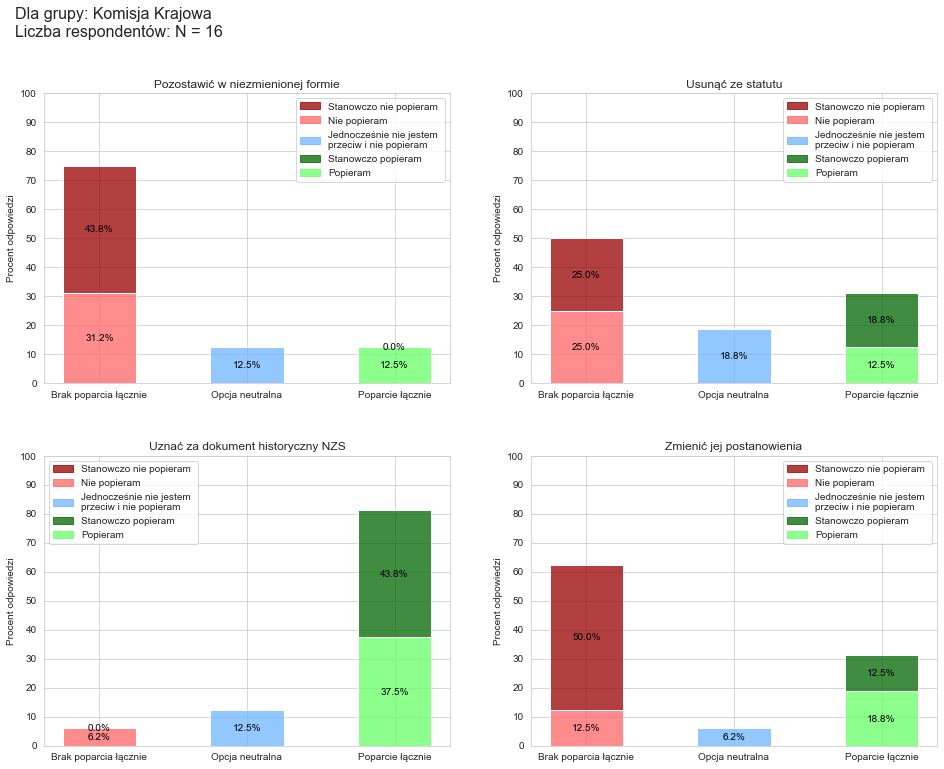

In [338]:
def statystyki_co_zrobic(df, typ_odpowiedzi="print",grupa=""):


#jak używać tej funkcji:

#do dfa dajesz odpowiedniego dfa, albo ogólny df, albo przetworzony z funkcji licz_odpowiedzi()

#do typ_odpowiedzi dajesz to, w jaki sposób chcesz dostać odpowiedź.
#jeśli chcesz, aby ci to wyprintowało, daj 'print'
#jeśli chcesz wykresy, daj 'wykres' (uwaga: one jeszcze wyglądają brzydko, są jeszcze w takiej podstawowej wersji)

#jako grupa wpisz ręcznie jak chcesz zatytułować badaną grupę na wykresie (jeśli zostawisz puste, w tytule wykresu wyświetli się tylko liczba odpowiedzi)
    
    
    jeden = (df['Pozostawić w niezmienionej formie'].value_counts() / len(df)) * 100
    jeden = jeden.reindex(['Stanowczo popieram','Popieram','Jednocześnie nie jestem przeciw i nie popieram','Nie popieram','Stanowczo nie popieram'])
    dwa = (df['Usunąć ze statutu'].value_counts() / len(df)) * 100
    dwa = dwa.reindex(['Stanowczo popieram','Popieram','Jednocześnie nie jestem przeciw i nie popieram','Nie popieram','Stanowczo nie popieram'])
    trzy = (df['Uznać za dokument historyczny NZS'].value_counts() / len(df)) * 100
    trzy = trzy.reindex(['Stanowczo popieram','Popieram','Jednocześnie nie jestem przeciw i nie popieram','Nie popieram','Stanowczo nie popieram'])
    cztery = (df['Zmienić jej postanowienia'].value_counts() / len(df)) * 100
    cztery = cztery.reindex(['Stanowczo popieram','Popieram','Jednocześnie nie jestem przeciw i nie popieram','Nie popieram','Stanowczo nie popieram'])
    

    if typ_odpowiedzi=="print":
        print('Pozostawić w niezmienionej formie')
        print('Stanowczo popieram {:.2f}%'.format(jeden.get('Stanowczo popieram', 0)))
        print('Popieram {:.2f}%'.format(jeden.get('Popieram', 0)))
        print('Jednocześnie nie jestem przeciw i nie popieram {:.2f}%'.format(jeden.get('Jednocześnie nie jestem przeciw i nie popieram', 0)))
        print('Nie popieram {:.2f}%'.format(jeden.get('Nie popieram', 0)))
        print('Stanowczo nie popieram {:.2f}%'.format(jeden.get('Stanowczo nie popieram', 0)))
        print()
        print('Usunąć ze statutu')
        print('Stanowczo popieram {:.2f}%'.format(dwa.get('Stanowczo popieram', 0)))
        print('Popieram {:.2f}%'.format(dwa.get('Popieram', 0)))
        print('Jednocześnie nie jestem przeciw i nie popieram {:.2f}%'.format(dwa.get('Jednocześnie nie jestem przeciw i nie popieram', 0)))
        print('Nie popieram {:.2f}%'.format(dwa.get('Nie popieram', 0)))
        print('Stanowczo nie popieram {:.2f}%'.format(dwa.get('Stanowczo nie popieram', 0)))
        print()
        print('Uznać za dokument historyczny NZS')
        print('Stanowczo popieram {:.2f}%'.format(trzy.get('Stanowczo popieram', 0)))
        print('Popieram {:.2f}%'.format(trzy.get('Popieram', 0)))
        print('Jednocześnie nie jestem przeciw i nie popieram {:.2f}%'.format(trzy.get('Jednocześnie nie jestem przeciw i nie popieram', 0)))
        print('Nie popieram {:.2f}%'.format(trzy.get('Nie popieram', 0)))
        print('Stanowczo nie popieram {:.2f}%'.format(trzy.get('Stanowczo nie popieram', 0)))
        print()
        print('Zmienić jej postanowienia')
        print('Stanowczo popieram {:.2f}%'.format(cztery.get('Stanowczo popieram', 0)))
        print('Popieram {:.2f}%'.format(cztery.get('Popieram', 0)))
        print('Jednocześnie nie jestem przeciw i nie popieram {:.2f}%'.format(cztery.get('Jednocześnie nie jestem przeciw i nie popieram', 0)))
        print('Nie popieram {:.2f}%'.format(cztery.get('Nie popieram', 0)))
        print('Stanowczo nie popieram {:.2f}%'.format(cztery.get('Stanowczo nie popieram', 0)))
        print()
    elif typ_odpowiedzi=='wykres':   
    
        sns.set_style("whitegrid")

        
        kolor1 = '#004D99'  # Dark blue
        kolor2 = '#6EB5FF'  # Light blue
        
        paleta=sns.color_palette([kolor1,kolor2])
        
        # Ciemny czerwony
        dark_red = '#990000'
        # Jasny czerwony
        light_red = '#FF6666'
        # Ciemny zielony
        dark_green = '#006600'
        # Jasny zielony
        light_green = '#66FF66'
        
        
        kolory=[dark_red,light_red,kolor2,dark_green,light_green]
        paleta_red=sns.color_palette([dark_green,light_green]) #czerwony i zielony są zamienione tu kolejnością, ale tak ma być
        paleta_green=sns.color_palette([dark_red,light_red])
        paleta_blue=sns.color_palette([kolor2])
        
        y_limits=(0,100)
        yticks=(range(0, 101, 10))
        
        
        fig, axs = plt.subplots(2, 2, figsize=(16, 12))
        plt.subplots_adjust(hspace=0.25)
        

        
        
        
        tabela=jeden


        data = { 
            'Odpowiedź':["Nie popieram","Nie popieram","Jednocześnie \nnie jestem przeciw \ni nie popieram","Popieram","Popieram"],
            'Stanowczość':["W tym stanowczo","","","W tym stanowczo",""],
            'Pełna_odpowiedź':["Stanowczo nie popieram","Nie popieram","Jednocześnie nie jestem \nprzeciw i nie popieram","Stanowczo popieram","Popieram"],
            'Procent': [tabela.iloc[4],tabela.iloc[3],tabela.iloc[2],tabela.iloc[0],tabela.iloc[1]],
            }
        data['Procent'] = [0 if pd.isna(value) else value for value in data['Procent']]
        data = pd.DataFrame(data)
        
        data1={
            'Odpowiedź':["Brak poparcia łącznie","Brak poparcia łącznie"],
            'Stanowczość':["W tym stanowczo",""],
            'Procent': [tabela.iloc[4],tabela.iloc[3]],
            }
        data1['Procent'] = [0 if pd.isna(value) else value for value in data1['Procent']]
        data1 = pd.DataFrame(data1)

        data2={
            'Odpowiedź':["Opcja neutralna"],
            'Stanowczość':[""],
            'Procent': [tabela.iloc[2]],
            }
        data2['Procent'] = [0 if pd.isna(value) else value for value in data2['Procent']]
        data2 = pd.DataFrame(data2)
        
        data3={
            'Odpowiedź':["Poparcie łącznie","Poparcie łącznie"],
            'Stanowczość':["W tym stanowczo",""],
            'Procent': [tabela.iloc[0],tabela.iloc[1]],
            }
        data3['Procent'] = [0 if pd.isna(value) else value for value in data3['Procent']]
        data3 = pd.DataFrame(data3)
            
        
    #tworzy wykres:
        ax = sns.histplot(
            data1, #data musisz stworzyć 3 osobne dfy, dla każdego słupka
            x='Odpowiedź',
            weights='Procent',
            hue='Stanowczość',
            palette=paleta_green[:len(data1['Stanowczość'].unique())], #3 osobne palety, odpowiednio dla każdego słupka
            multiple='stack',
            edgecolor='white',
            shrink=0.5,
           #miejsce w subplocie:
            ax=axs[0,0]) 
        ax.set_title('Pozostawić w niezmienionej formie')
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_ylim(y_limits)
        ax.set_yticks(yticks)
        #procenty na słupkach
        kolejnosc=[1,0]        ### tu do poprawy kolejność!!!
        for i in range(2):
            if kolejnosc[i]!=None:
                height=data1['Procent'][kolejnosc[i]]
                p=ax.patches[i] 
                ax.annotate(f'{height:.1f}%', 
                            #data['Odpowiedź'].iloc[i] - wrzucić to do annotate'a
                        (p.get_x() + p.get_width() / 2., height/2+p.get_y()), 
                        ha='center', va='bottom',
                        fontsize=10, color='black', xytext=(0, -5),
                        textcoords='offset points')
                
               
            
        ax = sns.histplot(
            data2, #data musisz stworzyć 3 osobne dfy, dla każdego słupka
            x='Odpowiedź',
            weights='Procent',
            hue='Stanowczość',
            palette=paleta_blue[:len(data2['Stanowczość'].unique())], #3 osobne palety, odpowiednio dla każdego słupka
            multiple='stack',
            edgecolor='white',
            shrink=0.5,
           #miejsce w subplocie:
            ax=axs[0,0]) 
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_ylim(y_limits)
        ax.set_yticks(yticks)
        #procenty na słupkach
        kolejnosc=[0]
        for i in range(1):
            if kolejnosc[i]!=None:
                height=data2['Procent'][kolejnosc[i]]
                p=ax.patches[i+2] 
                ax.annotate(f'{height:.1f}%', 
                            #data['Odpowiedź'].iloc[i] - wrzucić to do annotate'a
                        (p.get_x() + p.get_width() / 2., height/2+p.get_y()), 
                        ha='center', va='bottom',
                        fontsize=10, color='black', xytext=(0, -5),
                        textcoords='offset points')
               
            
            
        ax = sns.histplot(
            data3, #data musisz stworzyć 3 osobne dfy, dla każdego słupka
            x='Odpowiedź',
            weights='Procent',
            hue='Stanowczość',
            palette=paleta_red[:len(data3['Stanowczość'].unique())], #3 osobne palety, odpowiednio dla każdego słupka
            multiple='stack',
            edgecolor='white',
            shrink=0.5,
           #miejsce w subplocie:
            ax=axs[0,0]) 
        ax.set_ylabel("Procent odpowiedzi")
        ax.set_xlabel(None)
        ax.set_ylim(y_limits)
        ax.set_yticks(yticks)
        #procenty na słupkach
        kolejnosc=[1,0]
        for i in range(2):
            if kolejnosc[i]!=None:
                height=data3['Procent'][kolejnosc[i]]  #to do poprawy
                p=ax.patches[i+3] 
                ax.annotate(f'{height:.1f}%', 
                            #data['Odpowiedź'].iloc[i] - wrzucić to do annotate'a
                        (p.get_x() + p.get_width() / 2., height/2+p.get_y()), 
                        ha='center', va='bottom',
                        fontsize=10, color='black', xytext=(0, -5),
                        textcoords='offset points')           
 # tworzy legendę:
        legend_labels = data['Pełna_odpowiedź'].tolist()
        handles = [plt.Rectangle((0,0),1,1, color=kolory[i], alpha=0.75) for i in range(len(kolory))] 
            # dodanie legendy do osi wykresu
        ax.legend(handles, legend_labels)

   
        tabela=dwa


        data = { 
            'Odpowiedź':["Nie popieram","Nie popieram","Jednocześnie \nnie jestem przeciw \ni nie popieram","Popieram","Popieram"],
            'Stanowczość':["W tym stanowczo","","","W tym stanowczo",""],
            'Pełna_odpowiedź':["Stanowczo nie popieram","Nie popieram","Jednocześnie nie jestem \nprzeciw i nie popieram","Stanowczo popieram","Popieram"],
            'Procent': [tabela.iloc[4],tabela.iloc[3],tabela.iloc[2],tabela.iloc[0],tabela.iloc[1]],
            }
        data['Procent'] = [0 if pd.isna(value) else value for value in data['Procent']]
        data = pd.DataFrame(data)
        
        data1={
            'Odpowiedź':["Brak poparcia łącznie","Brak poparcia łącznie"],
            'Stanowczość':["W tym stanowczo",""],
            'Procent': [tabela.iloc[4],tabela.iloc[3]],
            }
        data1['Procent'] = [0 if pd.isna(value) else value for value in data1['Procent']]
        data1 = pd.DataFrame(data1)

        data2={
            'Odpowiedź':["Opcja neutralna"],
            'Stanowczość':[""],
            'Procent': [tabela.iloc[2]],
            }
        data2['Procent'] = [0 if pd.isna(value) else value for value in data2['Procent']]
        data2 = pd.DataFrame(data2)
        
        data3={
            'Odpowiedź':["Poparcie łącznie","Poparcie łącznie"],
            'Stanowczość':["W tym stanowczo",""],
            'Procent': [tabela.iloc[0],tabela.iloc[1]],
            }
        data3['Procent'] = [0 if pd.isna(value) else value for value in data3['Procent']]
        data3 = pd.DataFrame(data3)
            
        
    #tworzy wykres:
        ax = sns.histplot(
            data1, #data musisz stworzyć 3 osobne dfy, dla każdego słupka
            x='Odpowiedź',
            weights='Procent',
            hue='Stanowczość',
            palette=paleta_green[:len(data1['Stanowczość'].unique())], #3 osobne palety, odpowiednio dla każdego słupka
            multiple='stack',
            edgecolor='white',
            shrink=0.5,
           #miejsce w subplocie:
            ax=axs[0, 1]) 
        ax.set_title('Usunąć ze statutu')
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_ylim(y_limits)
        ax.set_yticks(yticks)
        #procenty na słupkach
        kolejnosc=[1,0]        ### tu do poprawy kolejność!!!
        for i in range(2):
            if kolejnosc[i]!=None:
                height=data1['Procent'][kolejnosc[i]]
                p=ax.patches[i] 
                ax.annotate(f'{height:.1f}%', 
                            #data['Odpowiedź'].iloc[i] - wrzucić to do annotate'a
                        (p.get_x() + p.get_width() / 2., height/2+p.get_y()), 
                        ha='center', va='bottom',
                        fontsize=10, color='black', xytext=(0, -5),
                        textcoords='offset points')
                
               
            
        ax = sns.histplot(
            data2, #data musisz stworzyć 3 osobne dfy, dla każdego słupka
            x='Odpowiedź',
            weights='Procent',
            hue='Stanowczość',
            palette=paleta_blue[:len(data2['Stanowczość'].unique())], #3 osobne palety, odpowiednio dla każdego słupka
            multiple='stack',
            edgecolor='white',
            shrink=0.5,
           #miejsce w subplocie:
            ax=axs[0, 1]) 
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_ylim(y_limits)
        ax.set_yticks(yticks)
        #procenty na słupkach
        kolejnosc=[0]
        for i in range(1):
            if kolejnosc[i]!=None:
                height=data2['Procent'][kolejnosc[i]]
                p=ax.patches[i+2] 
                ax.annotate(f'{height:.1f}%', 
                            #data['Odpowiedź'].iloc[i] - wrzucić to do annotate'a
                        (p.get_x() + p.get_width() / 2., height/2+p.get_y()), 
                        ha='center', va='bottom',
                        fontsize=10, color='black', xytext=(0, -5),
                        textcoords='offset points')
               
            
            
        ax = sns.histplot(
            data3, #data musisz stworzyć 3 osobne dfy, dla każdego słupka
            x='Odpowiedź',
            weights='Procent',
            hue='Stanowczość',
            palette=paleta_red[:len(data3['Stanowczość'].unique())], #3 osobne palety, odpowiednio dla każdego słupka
            multiple='stack',
            edgecolor='white',
            shrink=0.5,
           #miejsce w subplocie:
            ax=axs[0, 1]) 
        ax.set_ylabel("Procent odpowiedzi")
        ax.set_xlabel(None)
        ax.set_ylim(y_limits)
        ax.set_yticks(yticks)
        #procenty na słupkach
        kolejnosc=[1,0]
        for i in range(2):
            if kolejnosc[i]!=None:
                height=data3['Procent'][kolejnosc[i]]  #to do poprawy
                p=ax.patches[i+3] 
                ax.annotate(f'{height:.1f}%', 
                            #data['Odpowiedź'].iloc[i] - wrzucić to do annotate'a
                        (p.get_x() + p.get_width() / 2., height/2+p.get_y()), 
                        ha='center', va='bottom',
                        fontsize=10, color='black', xytext=(0, -5),
                        textcoords='offset points')           
 # tworzy legendę:
        legend_labels = data['Pełna_odpowiedź'].tolist()
        handles = [plt.Rectangle((0,0),1,1, color=kolory[i], alpha=0.75) for i in range(len(kolory))] 
            # dodanie legendy do osi wykresu
        ax.legend(handles, legend_labels)
        
        
    
        tabela=trzy


        data = { 
            'Odpowiedź':["Nie popieram","Nie popieram","Jednocześnie \nnie jestem przeciw \ni nie popieram","Popieram","Popieram"],
            'Stanowczość':["W tym stanowczo","","","W tym stanowczo",""],
            'Pełna_odpowiedź':["Stanowczo nie popieram","Nie popieram","Jednocześnie nie jestem \nprzeciw i nie popieram","Stanowczo popieram","Popieram"],
            'Procent': [tabela.iloc[4],tabela.iloc[3],tabela.iloc[2],tabela.iloc[0],tabela.iloc[1]],
            }
        data['Procent'] = [0 if pd.isna(value) else value for value in data['Procent']]
        data = pd.DataFrame(data)
        
        data1={
            'Odpowiedź':["Brak poparcia łącznie","Brak poparcia łącznie"],
            'Stanowczość':["W tym stanowczo",""],
            'Procent': [tabela.iloc[4],tabela.iloc[3]],
            }
        data1['Procent'] = [0 if pd.isna(value) else value for value in data1['Procent']]
        data1 = pd.DataFrame(data1)

        data2={
            'Odpowiedź':["Opcja neutralna"],
            'Stanowczość':[""],
            'Procent': [tabela.iloc[2]],
            }
        data2['Procent'] = [0 if pd.isna(value) else value for value in data2['Procent']]
        data2 = pd.DataFrame(data2)
        
        data3={
            'Odpowiedź':["Poparcie łącznie","Poparcie łącznie"],
            'Stanowczość':["W tym stanowczo",""],
            'Procent': [tabela.iloc[0],tabela.iloc[1]],
            }
        data3['Procent'] = [0 if pd.isna(value) else value for value in data3['Procent']]
        data3 = pd.DataFrame(data3)
            
        
    #tworzy wykres:
        ax = sns.histplot(
            data1, #data musisz stworzyć 3 osobne dfy, dla każdego słupka
            x='Odpowiedź',
            weights='Procent',
            hue='Stanowczość',
            palette=paleta_green[:len(data1['Stanowczość'].unique())], #3 osobne palety, odpowiednio dla każdego słupka
            multiple='stack',
            edgecolor='white',
            shrink=0.5,
           #miejsce w subplocie:
            ax=axs[1, 0]) 
        ax.set_title('Uznać za dokument historyczny NZS')
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_ylim(y_limits)
        ax.set_yticks(yticks)
        #procenty na słupkach
        kolejnosc=[1,0]        ### tu do poprawy kolejność!!!
        for i in range(2):
            if kolejnosc[i]!=None:
                height=data1['Procent'][kolejnosc[i]]
                p=ax.patches[i] 
                ax.annotate(f'{height:.1f}%', 
                            #data['Odpowiedź'].iloc[i] - wrzucić to do annotate'a
                        (p.get_x() + p.get_width() / 2., height/2+p.get_y()), 
                        ha='center', va='bottom',
                        fontsize=10, color='black', xytext=(0, -5),
                        textcoords='offset points')
                
               
            
        ax = sns.histplot(
            data2, #data musisz stworzyć 3 osobne dfy, dla każdego słupka
            x='Odpowiedź',
            weights='Procent',
            hue='Stanowczość',
            palette=paleta_blue[:len(data2['Stanowczość'].unique())], #3 osobne palety, odpowiednio dla każdego słupka
            multiple='stack',
            edgecolor='white',
            shrink=0.5,
           #miejsce w subplocie:
            ax=axs[1, 0]) 
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_ylim(y_limits)
        ax.set_yticks(yticks)
        #procenty na słupkach
        kolejnosc=[0]
        for i in range(1):
            if kolejnosc[i]!=None:
                height=data2['Procent'][kolejnosc[i]]
                p=ax.patches[i+2] 
                ax.annotate(f'{height:.1f}%', 
                            #data['Odpowiedź'].iloc[i] - wrzucić to do annotate'a
                        (p.get_x() + p.get_width() / 2., height/2+p.get_y()), 
                        ha='center', va='bottom',
                        fontsize=10, color='black', xytext=(0, -5),
                        textcoords='offset points')
               
            
            
        ax = sns.histplot(
            data3, #data musisz stworzyć 3 osobne dfy, dla każdego słupka
            x='Odpowiedź',
            weights='Procent',
            hue='Stanowczość',
            palette=paleta_red[:len(data3['Stanowczość'].unique())], #3 osobne palety, odpowiednio dla każdego słupka
            multiple='stack',
            edgecolor='white',
            shrink=0.5,
           #miejsce w subplocie:
            ax=axs[1, 0]) 
        ax.set_ylabel("Procent odpowiedzi")
        ax.set_xlabel(None)
        ax.set_ylim(y_limits)
        ax.set_yticks(yticks)
        #procenty na słupkach
        kolejnosc=[1,0]
        for i in range(2):
            if kolejnosc[i]!=None:
                height=data3['Procent'][kolejnosc[i]]  #to do poprawy
                p=ax.patches[i+3] 
                ax.annotate(f'{height:.1f}%', 
                            #data['Odpowiedź'].iloc[i] - wrzucić to do annotate'a
                        (p.get_x() + p.get_width() / 2., height/2+p.get_y()), 
                        ha='center', va='bottom',
                        fontsize=10, color='black', xytext=(0, -5),
                        textcoords='offset points')           
 # tworzy legendę:
        legend_labels = data['Pełna_odpowiedź'].tolist()
        handles = [plt.Rectangle((0,0),1,1, color=kolory[i], alpha=0.75) for i in range(len(kolory))] 
            # dodanie legendy do osi wykresu
        ax.legend(handles, legend_labels)
        
        
        tabela=cztery

        data = { 
            'Odpowiedź':["Nie popieram","Nie popieram","Jednocześnie \nnie jestem przeciw \ni nie popieram","Popieram","Popieram"],
            'Stanowczość':["W tym stanowczo","","","W tym stanowczo",""],
            'Pełna_odpowiedź':["Stanowczo nie popieram","Nie popieram","Jednocześnie nie jestem \nprzeciw i nie popieram","Stanowczo popieram","Popieram"],
            'Procent': [tabela.iloc[4],tabela.iloc[3],tabela.iloc[2],tabela.iloc[0],tabela.iloc[1]],
            }
        data['Procent'] = [0 if pd.isna(value) else value for value in data['Procent']]
        data = pd.DataFrame(data)
        
        data1={
            'Odpowiedź':["Brak poparcia łącznie","Brak poparcia łącznie"],
            'Stanowczość':["W tym stanowczo",""],
            'Procent': [tabela.iloc[4],tabela.iloc[3]],
            }
        data1['Procent'] = [0 if pd.isna(value) else value for value in data1['Procent']]
        data1 = pd.DataFrame(data1)

        data2={
            'Odpowiedź':["Opcja neutralna"],
            'Stanowczość':[""],
            'Procent': [tabela.iloc[2]],
            }
        data2['Procent'] = [0 if pd.isna(value) else value for value in data2['Procent']]
        data2 = pd.DataFrame(data2)
        
        data3={
            'Odpowiedź':["Poparcie łącznie","Poparcie łącznie"],
            'Stanowczość':["W tym stanowczo",""],
            'Procent': [tabela.iloc[0],tabela.iloc[1]],
            }
        data3['Procent'] = [0 if pd.isna(value) else value for value in data3['Procent']]
        data3 = pd.DataFrame(data3)
            
        
    #tworzy wykres:
        ax = sns.histplot(
            data1, #data musisz stworzyć 3 osobne dfy, dla każdego słupka
            x='Odpowiedź',
            weights='Procent',
            hue='Stanowczość',
            palette=paleta_green[:len(data1['Stanowczość'].unique())], #3 osobne palety, odpowiednio dla każdego słupka
            multiple='stack',
            edgecolor='white',
            shrink=0.5,
           #miejsce w subplocie:
            ax=axs[1, 1]) 
        ax.set_title('Zmienić jej postanowienia')
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_ylim(y_limits)
        ax.set_yticks(yticks)
        #procenty na słupkach
        kolejnosc=[1,0]      
        for i in range(2):
            if kolejnosc[i]!=None:
                height=data1['Procent'][kolejnosc[i]]
                p=ax.patches[i] 
                ax.annotate(f'{height:.1f}%', 
                            #data['Odpowiedź'].iloc[i] - wrzucić to do annotate'a
                        (p.get_x() + p.get_width() / 2., height/2+p.get_y()), 
                        ha='center', va='bottom',
                        fontsize=10, color='black', xytext=(0, -5),
                        textcoords='offset points')
                
               
            
        ax = sns.histplot(
            data2, #data musisz stworzyć 3 osobne dfy, dla każdego słupka
            x='Odpowiedź',
            weights='Procent',
            hue='Stanowczość',
            palette=paleta_blue[:len(data2['Stanowczość'].unique())], #3 osobne palety, odpowiednio dla każdego słupka
            multiple='stack',
            edgecolor='white',
            shrink=0.5,
           #miejsce w subplocie:
            ax=axs[1, 1]) 
        ax.set_title('Zmienić jej postanowienia')
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_ylim(y_limits)
        ax.set_yticks(yticks)
        #procenty na słupkach
        kolejnosc=[0]
        for i in range(1):
            if kolejnosc[i]!=None:
                height=data2['Procent'][kolejnosc[i]]
                p=ax.patches[i+2] 
                ax.annotate(f'{height:.1f}%', 
                            #data['Odpowiedź'].iloc[i] - wrzucić to do annotate'a
                        (p.get_x() + p.get_width() / 2., height/2+p.get_y()), 
                        ha='center', va='bottom',
                        fontsize=10, color='black', xytext=(0, -5),
                        textcoords='offset points')
               
            
            
        ax = sns.histplot(
            data3, #data musisz stworzyć 3 osobne dfy, dla każdego słupka
            x='Odpowiedź',
            weights='Procent',
            hue='Stanowczość',
            palette=paleta_red[:len(data3['Stanowczość'].unique())], #3 osobne palety, odpowiednio dla każdego słupka
            multiple='stack',
            edgecolor='white',
            shrink=0.5,
           #miejsce w subplocie:
            ax=axs[1, 1]) 
        ax.set_title('Zmienić jej postanowienia')
        ax.set_ylabel("Procent odpowiedzi")
        ax.set_xlabel(None)
        ax.set_ylim(y_limits)
        ax.set_yticks(yticks)
        
        #procenty na słupkach
        kolejnosc=[1,0]
        for i in range(2):
            if kolejnosc[i]!=None:
                height=data3['Procent'][kolejnosc[i]] 
                p=ax.patches[i+3] 
                ax.annotate(f'{height:.1f}%', 
                            #data['Odpowiedź'].iloc[i] - wrzucić to do annotate'a
                        (p.get_x() + p.get_width() / 2., height/2+p.get_y()), 
                        ha='center', va='bottom',
                        fontsize=10, color='black', xytext=(0, -5),
                        textcoords='offset points')           
 # tworzy legendę:
        legend_labels = data['Pełna_odpowiedź'].tolist()
        handles = [plt.Rectangle((0,0),1,1, color=kolory[i], alpha=0.75) for i in range(len(kolory))] 
            # dodanie legendy do osi wykresu
        ax.legend(handles, legend_labels)

        
        
        if grupa=="":
            tytul = "Liczba respondentów: N = " + str(len(df))
        else:
            tytul = "Dla grupy: " + grupa + "\nLiczba respondentów: N = " + str(len(df))
        fig.suptitle(tytul, fontsize=16,x=0.1,ha="left")



        
dane=(licz_odpowiedzi('nzs','KK','df','oba'))
statystyki_co_zrobic(dane,'wykres',"Komisja Krajowa")
#statystyki_co_zrobic(dane,'print')

In [203]:
licz_odpowiedzi('nzs','Nie jestem członkiem społeczności NZS','df','oba')


0      False
1      False
2      False
3      False
4      False
       ...  
546    False
547    False
548    False
549    False
550    False
Name: Jaki jest Twój status/funkcja w \nNZS-ie?, Length: 551, dtype: bool

In [340]:
def statystyki_co_zrobic(df, typ_odpowiedzi="print"):
    categories = ['Stanowczo popieram', 'Popieram', 'Jednocześnie nie jestem przeciw i nie popieram', 'Nie popieram', 'Stanowczo nie popieram']
    data = {category: pd.DataFrame() for category in categories}
    
    for category in categories:
        for column in df.columns:
            if category in column:
                data[category][column] = (df[column].value_counts() / len(df)) * 100
    
    if typ_odpowiedzi == "print":
        for category in categories:
            print(category)
            print(data[category].to_string(index=True))
            print()
    elif typ_odpowiedzi == 'wykres':
        fig, axs = plt.subplots(2, 2, figsize=(14, 10))

        for i, category in enumerate(categories):
            if not data[category].empty:  # Sprawdzenie czy DataFrame nie jest pusty
                sns.barplot(data=data[category], ax=axs[i//2, i%2])
                axs[i//2, i%2].set_title(category)
                axs[i//2, i%2].set_ylabel('Procent')

        plt.tight_layout()
        plt.show()

        
dane=(licz_odpowiedzi('nzs','obecni','df','oba'))
statystyki_co_zrobic(dane)

Stanowczo popieram
Empty DataFrame
Columns: []
Index: []

Popieram
Empty DataFrame
Columns: []
Index: []

Jednocześnie nie jestem przeciw i nie popieram
Empty DataFrame
Columns: []
Index: []

Nie popieram
Empty DataFrame
Columns: []
Index: []

Stanowczo nie popieram
Empty DataFrame
Columns: []
Index: []



In [ ]:
# FUNKCJE

In [ ]:
#FUNKCJE DO ZROBIENIA:

#PRZEDSTAWIAJ ODPOWIEDZI DO PYTAŃ OTWARTYCH, 


In [ ]:
# PONIŻSZYM KODEM MOŻESZ ,,BAWIĆ SIĘ" DO WOLI - PRZEPROWADZAJ WŁASNE ANALIZY, PRINTUJ JEDNOCZEŚNIE ILEŚ DANYCH,
# ZMIENIAJ DANE KTÓRE SPRAWDZASZ, SZUKAJ CIEKAWYCH INFORMACJI, ZALEŻNOŚCI I TAK DALEJ

#KOD, KTÓRY JEST PONIŻEJ TO PRZYKŁADOWE ANALIZY, JAKIE SĄ JUŻ GOTOWE

In [17]:
licz_odpowiedzi('nzs','wszyscy','print','oba')



Liczba wszystkich odpowiedzi wynosi: 551

Liczba odpowiedzi od osób spoza NZSu wynosi: 2

Liczba odpowiedzi od osób ze społeczności NZS wynosi: 549

Liczba odpowiedzi od Alumnów wynosi: 171
W tym:
Alumnów w wieku do 28 lat: 36
Alumnów w wieku 29-39 lat: 98
Alumnów w wieku 40-50 lat: 12
Alumnów w wieku 51-62 lat 11
Alumnów w wieku powyżej 62 lat: 14

Liczba odpowiedzi od obecnych Członków i Sympatyków wynosi: 378

Liczba odpowiedzi od Sympatyków wynosi: 116

Liczba odpowiedzi od Członków wynosi: 262

Liczba odpowiedzi od Komisji Krajowej wynosi: 16

Liczba odpowiedzi od Zarządu Krajowego i Krajowej Komisji Rewizyjnej wynosi 14


Liczby odpowiedzi z poszczególnych uczelni:

        Uniwersytet Marii Curie-Skłodowskiej w Lublinie : 10
                             Akademia Górniczo-Hutnicza : 12
                 Uniwersytet Komisji Edukacji Narodowej : 21
                               Uniwersytet Jagielloński : 16
                                 Uniwersytet Wrocławski : 26
              

In [11]:
statystyki_punktow_di(df)

{'srednia': {'Punkt Deklaracji nr.1': 2.838475499092559,
  'Punkt Deklaracji nr.2': 3.8148820326678767,
  'Punkt Deklaracji nr.3': 2.5499092558983665,
  'Punkt Deklaracji nr.4': 3.94010889292196,
  'Punkt Deklaracji nr.5': 3.807622504537205,
  'Punkt Deklaracji nr.6': 3.8421052631578947,
  'Punkt Deklaracji nr.7': 4.190562613430127,
  'Punkt Deklaracji nr.8': 4.045372050816697,
  'Punkt Deklaracji nr.9': 4.096188747731397,
  'Punkt Deklaracji nr.10': 3.544464609800363,
  'srednia': 3.6669691470054446},
 'kwartyl_0,25': {'Punkt Deklaracji nr.1': 2.0,
  'Punkt Deklaracji nr.2': 3.0,
  'Punkt Deklaracji nr.3': 1.0,
  'Punkt Deklaracji nr.4': 3.0,
  'Punkt Deklaracji nr.5': 3.0,
  'Punkt Deklaracji nr.6': 3.0,
  'Punkt Deklaracji nr.7': 4.0,
  'Punkt Deklaracji nr.8': 3.0,
  'Punkt Deklaracji nr.9': 4.0,
  'Punkt Deklaracji nr.10': 3.0,
  'srednia': 2.9},
 'mediana': {'Punkt Deklaracji nr.1': 3.0,
  'Punkt Deklaracji nr.2': 4.0,
  'Punkt Deklaracji nr.3': 2.0,
  'Punkt Deklaracji nr.4': 4.

In [191]:
#tu możesz policzyć sobie średnie (lub inne statystyki) dla wybranych grup
print('Średnie z odpowiedzi do punktów Deklaracji')
print()
print('Dla grupy osób z obecnego nzsu, czyli z sympatykami')
dane=licz_odpowiedzi('nzs','obecni','df','oba')
statystyki=statystyki_punktow_di(dane)
print("Liczba odpowiedzi:",len(dane))
for key, value in statystyki['srednia'].items():
    print(f'{key}: {value}')
print()
print("Dla grupy alumnów:")
dane=licz_odpowiedzi('nzs','Alumn','df','oba')
statystyki=statystyki_punktow_di(dane)
print("Liczba odpowiedzi:",len(dane))
for key, value in statystyki['srednia'].items():
    print(f'{key}: {value}')
print()
print("Dla obecnych członków")
dane=licz_odpowiedzi('nzs','Członek','df','oba')
statystyki=statystyki_punktow_di(dane)
print("Liczba odpowiedzi:",len(dane))
for key, value in statystyki['srednia'].items():
    print(f'{key}: {value}')
print()
print("Dla obecnych KK, ZK i KKR")
dane=licz_odpowiedzi('nzs','wladze','df','oba')
statystyki=statystyki_punktow_di(dane)
print("Liczba odpowiedzi:",len(dane))
for key, value in statystyki['srednia'].items():
    print(f'{key}: {value}')
print()
print()

print("Odchylenia standardowe, czyli miara różnorodności odpowiedzi dla poszczególnych punktów deklraracji:")
print()
print('Dla grupy osób z obecnego nzsu:')
dane=licz_odpowiedzi('nzs','obecni','df','oba')
statystyki=statystyki_punktow_di(dane)
print("Liczba odpowiedzi:",len(dane))
for key, value in statystyki['odchylenie'].items():
    print(f'{key}: {value}')
print()
print("Dla grupy alumnów:")
dane=licz_odpowiedzi('nzs','Alumn','df','oba')
statystyki=statystyki_punktow_di(dane)
print("Liczba odpowiedzi:",len(dane))
for key, value in statystyki['odchylenie'].items():
    print(f'{key}: {value}')
print()
print("Dla obecnych członków")
dane=licz_odpowiedzi('nzs','Członek','df','oba')
statystyki=statystyki_punktow_di(dane)
print("Liczba odpowiedzi:",len(dane))
for key, value in statystyki['odchylenie'].items():
    print(f'{key}: {value}')
print()
print("Dla obecnych KK, ZK i KKR")
dane=licz_odpowiedzi('nzs','wladze','df','oba')
statystyki=statystyki_punktow_di(dane)
print("Liczba odpowiedzi:",len(dane))
for key, value in statystyki['odchylenie'].items():
    print(f'{key}: {value}')
print()
print()   



Średnie z odpowiedzi do punktów Deklaracji

Dla grupy osób z obecnego nzsu, czyli z sympatykami
Liczba odpowiedzi: 378
Punkt Deklaracji nr.1: 2.828042328042328
Punkt Deklaracji nr.2: 3.867724867724868
Punkt Deklaracji nr.3: 2.5952380952380953
Punkt Deklaracji nr.4: 3.947089947089947
Punkt Deklaracji nr.5: 3.761904761904762
Punkt Deklaracji nr.6: 3.7962962962962963
Punkt Deklaracji nr.7: 4.224867724867725
Punkt Deklaracji nr.8: 4.108465608465608
Punkt Deklaracji nr.9: 4.169312169312169
Punkt Deklaracji nr.10: 3.5846560846560847
srednia: 3.688359788359788

Dla grupy alumnów:
Liczba odpowiedzi: 171
Punkt Deklaracji nr.1: 2.8596491228070176
Punkt Deklaracji nr.2: 3.690058479532164
Punkt Deklaracji nr.3: 2.4444444444444446
Punkt Deklaracji nr.4: 3.9239766081871346
Punkt Deklaracji nr.5: 3.9064327485380117
Punkt Deklaracji nr.6: 3.9298245614035086
Punkt Deklaracji nr.7: 4.111111111111111
Punkt Deklaracji nr.8: 3.9005847953216373
Punkt Deklaracji nr.9: 3.9415204678362574
Punkt Deklaracji nr.1

In [13]:
#tu wypisze dane statystyki dla poszczególnych ou

#zmieniasz tu tylko poniższą zmienną
grupa='obecni' #dodałem tę zmienną, żeby nie trzeba było jej wpisywać dwa razy


print("Średnie odpowiedzi do punktów DI z poszczególnych uczelni:")
print()
dane=(licz_odpowiedzi('nzs',grupa,'df','oba'))
statystyki=statystyki_punktow_di(dane)
print("Razem".rjust(56), "(", len(dane['ID']), ")", ":", statystyki['srednia']['srednia'])
for uczelnia in lista_ou:
    dane=(licz_odpowiedzi(uczelnia,grupa,'df','oba'))
    statystyki=statystyki_punktow_di(dane)
    print(uczelnia.rjust(56),"(", str(len(dane['ID'])).ljust(2), ")", ":", statystyki['srednia']['srednia'])

    
    

Średnie odpowiedzi do punktów DI z poszczególnych uczelni:

                                                   Razem ( 378 ) : 3.688359788359788
         Uniwersytet Marii Curie-Skłodowskiej w Lublinie ( 9  ) : 3.844444444444444
                              Akademia Górniczo-Hutnicza ( 4  ) : 2.5
                  Uniwersytet Komisji Edukacji Narodowej ( 18 ) : 3.7777777777777777
                                Uniwersytet Jagielloński ( 12 ) : 4.008333333333334
                                  Uniwersytet Wrocławski ( 16 ) : 3.16875
                                  Uniwersytet Rzeszowski ( 14 ) : 4.278571428571429
          Uniwersytet im. Kardynała Stefana Wyszyńskiego ( 9  ) : 3.6333333333333337
                                  Uniwersytet Warszawski ( 49 ) : 3.53469387755102
                                  Politechnika Krakowska ( 1  ) : 4.1
                                 Politechnika Warszawska ( 13 ) : 3.6230769230769235
            Uniwersytet im. Adama Mickiewicza w Poz

In [299]:
print('Liczba wszystkich odpowiedzi z podziałem na ou:')
print(licz_odpowiedzi('nzs','wszyscy','print','status'))
print()
print()
print('Liczba odpowiedzi od osób z obecnego nzsu według ou:')
print(licz_odpowiedzi('nzs','obecni','print','ou'))


print('wszyscy - wszystkie odpowiedzi w ankiecie (opcja domyślna)')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','wszyscy','df','oba'),'print')
print()
print()
#print('Nie jestem członkiem społeczności NZS - wszystkie odpowiedzi w ankiecie bez osób bez związku z nzsem')
#print()
#statystyki_co_zrobic(licz_odpowiedzi('nzs','Nie jestem członkiem społeczności NZS','df','oba'),'print')
#print()
#print()
print('nzs - wszystkie odpowiedzi bez osób spoza społeczności NZSu')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','nzs','df','oba'),'print')
print()
print()
print('Alumn - wszyscy alumni')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn','df','oba'),'print')  
print()  
print()
print('Alumn1 - alumni do 28 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn1','df','oba'),'print')  
print()    
print()
print('Alumn2 - alumni 29-39 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn2','df','oba'),'print')    
print()    
print()
print('Alumn3 - alumni 40-50 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn3','df','oba'),'print')
print()
print()
print('Alumn4 - alumni 51-61 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn4','df','oba'),'print')  
print()   
print()   
print('Alumn5 - alumni od 62 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn5','df','oba'),'print')     
print()      
print()
print('obecni - obecni członkowie i sympatycy')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','obecni','df','oba'),'print')     
print() 
print()    
print('obecni_bez_wladz - obecni członkowie i sympatycy bez KK, ZK, KKR ')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','obecni_bez_wladz','df','oba'),'print')      
print()   
print()   
print('Sympatyk - obecni sympatycy')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Sympatyk','df','oba'),'print')
print()      
print()
print('Członek - obecni członkowie')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Członek','df','oba'),'print')      
print() 
print()     
print('czlonkowie_bez_wladz - obecni członkowie bez KK, ZK, KKR')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','czlonkowie_bez_wladz','df','oba'),'print')      
print() 
print()     
print('wladze - KK, ZK, KKR (uwaga: te grupy nie zaznaczały przynależności do OU)')
statystyki_co_zrobic(licz_odpowiedzi('nzs','wladze','df','oba'),'print')     
print() 
print()      
print('Komisja Krajowa - Komisja Krajowa')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Komisja Krajowa','df','oba'),'print')      
print()      
print()
print('Zarząd Krajowy/Krajowa Komisja Rewizyjna')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Zarząd Krajowy/Krajowa Komisja Rewizyjna','df','oba'),'print')






Liczba wszystkich odpowiedzi z podziałem na ou:
Liczba wszystkich odpowiedzi wynosi: 551

Liczba odpowiedzi od osób spoza NZSu wynosi: 2

Liczba odpowiedzi od osób ze społeczności NZS wynosi: 549

Liczba odpowiedzi od Alumnów wynosi: 171
W tym:
Alumnów w wieku do 28 lat: 36
Alumnów w wieku 29-39 lat: 98
Alumnów w wieku 40-50 lat: 12
Alumnów w wieku 51-62 lat 11
Alumnów w wieku powyżej 62 lat: 14

Liczba odpowiedzi od obecnych Członków i Sympatyków wynosi: 378

Liczba odpowiedzi od Sympatyków wynosi: 116

Liczba odpowiedzi od Członków wynosi: 262

Liczba odpowiedzi od Komisji Krajowej wynosi: 16

Liczba odpowiedzi od Zarządu Krajowego i Krajowej Komisji Rewizyjnej wynosi 14

None


Liczba odpowiedzi od osób z obecnego nzsu według ou:

Liczby odpowiedzi z poszczególnych uczelni:

        Uniwersytet Marii Curie-Skłodowskiej w Lublinie : 9
                             Akademia Górniczo-Hutnicza : 4
                 Uniwersytet Komisji Edukacji Narodowej : 18
                              

Liczba wszystkich odpowiedzi z podziałem na ou:
Liczba wszystkich odpowiedzi wynosi: 551

Liczba odpowiedzi od osób spoza NZSu wynosi: 2

Liczba odpowiedzi od osób ze społeczności NZS wynosi: 549

Liczba odpowiedzi od Alumnów wynosi: 171
W tym:
Alumnów w wieku do 28 lat: 36
Alumnów w wieku 29-39 lat: 98
Alumnów w wieku 40-50 lat: 12
Alumnów w wieku 51-62 lat 11
Alumnów w wieku powyżej 62 lat: 14

Liczba odpowiedzi od obecnych Członków i Sympatyków wynosi: 378

Liczba odpowiedzi od Sympatyków wynosi: 116

Liczba odpowiedzi od Członków wynosi: 262

Liczba odpowiedzi od Komisji Krajowej wynosi: 16

Liczba odpowiedzi od Zarządu Krajowego i Krajowej Komisji Rewizyjnej wynosi 14

None


Liczba odpowiedzi od osób z obecnego nzsu według ou:

Liczby odpowiedzi z poszczególnych uczelni:

        Uniwersytet Marii Curie-Skłodowskiej w Lublinie : 9
                             Akademia Górniczo-Hutnicza : 4
                 Uniwersytet Komisji Edukacji Narodowej : 18
                              

Pozostawić w niezmienionej formie
Stanowczo popieram 14.29%
Popieram nan%
Jednocześnie nie jestem przeciw i nie popieram 35.71%
Nie popieram 14.29%
Stanowczo nie popieram 35.71%

Usunąć ze statutu
Stanowczo popieram 14.29%
Popieram 21.43%
Jednocześnie nie jestem przeciw i nie popieram 28.57%
Nie popieram 14.29%
Stanowczo nie popieram 21.43%

Uznać za dokument historyczny NZS
Stanowczo popieram 28.57%
Popieram 21.43%
Jednocześnie nie jestem przeciw i nie popieram 21.43%
Nie popieram 14.29%
Stanowczo nie popieram 14.29%

Zmienić jej postanowienia
Stanowczo popieram nan%
Popieram 14.29%
Jednocześnie nie jestem przeciw i nie popieram 21.43%
Nie popieram 21.43%
Stanowczo nie popieram 42.86%



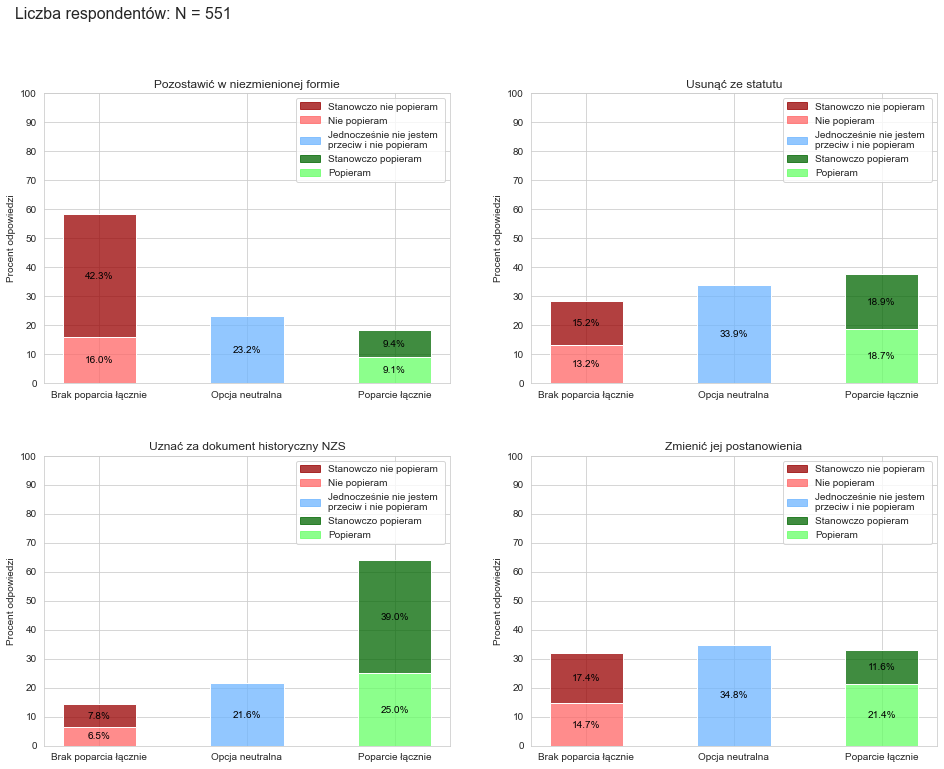

In [339]:
print('Liczba wszystkich odpowiedzi z podziałem na ou:')
print(licz_odpowiedzi('nzs','wszyscy','print','status'))
print()
print()
print('Liczba odpowiedzi od osób z obecnego nzsu według ou:')
print(licz_odpowiedzi('nzs','obecni','print','ou'))


print('wszyscy - wszystkie odpowiedzi w ankiecie (opcja domyślna)')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','wszyscy','df','oba'),'wykres',) #tu skończyłem
print()
print()
#print('Nie jestem członkiem społeczności NZS - wszystkie odpowiedzi w ankiecie bez osób bez związku z nzsem')
#print()
#statystyki_co_zrobic(licz_odpowiedzi('nzs','Nie jestem członkiem społeczności NZS','df','oba'),'print')
#print()
#print()
print('nzs - wszystkie odpowiedzi bez osób spoza społeczności NZSu')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','nzs','df','oba'),'print')
print()
print()
print('Alumn - wszyscy alumni')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn','df','oba'),'print')  
print()  
print()
print('Alumn1 - alumni do 28 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn1','df','oba'),'print')  
print()    
print()
print('Alumn2 - alumni 29-39 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn2','df','oba'),'print')    
print()    
print()
print('Alumn3 - alumni 40-50 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn3','df','oba'),'print')
print()
print()
print('Alumn4 - alumni 51-61 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn4','df','oba'),'print')  
print()   
print()   
print('Alumn5 - alumni od 62 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn5','df','oba'),'print')     
print()      
print()
print('obecni - obecni członkowie i sympatycy')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','obecni','df','oba'),'print')     
print() 
print()    
print('obecni_bez_wladz - obecni członkowie i sympatycy bez KK, ZK, KKR ')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','obecni_bez_wladz','df','oba'),'print')      
print()   
print()   
print('Sympatyk - obecni sympatycy')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Sympatyk','df','oba'),'print')
print()      
print()
print('Członek - obecni członkowie')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Członek','df','oba'),'print')      
print() 
print()     
print('czlonkowie_bez_wladz - obecni członkowie bez KK, ZK, KKR')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','czlonkowie_bez_wladz','df','oba'),'print')      
print() 
print()     
print('wladze - KK, ZK, KKR (uwaga: te grupy nie zaznaczały przynależności do OU)')
statystyki_co_zrobic(licz_odpowiedzi('nzs','wladze','df','oba'),'print')     
print() 
print()      
print('Komisja Krajowa - Komisja Krajowa')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Komisja Krajowa','df','oba'),'print')      
print()      
print()
print('Zarząd Krajowy/Krajowa Komisja Rewizyjna')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Zarząd Krajowy/Krajowa Komisja Rewizyjna','df','oba'),'print')






Liczba wszystkich odpowiedzi z podziałem na ou:
Liczba wszystkich odpowiedzi wynosi: 551

Liczba odpowiedzi od osób spoza NZSu wynosi: 2

Liczba odpowiedzi od osób ze społeczności NZS wynosi: 549

Liczba odpowiedzi od Alumnów wynosi: 171
W tym:
Alumnów w wieku do 28 lat: 36
Alumnów w wieku 29-39 lat: 98
Alumnów w wieku 40-50 lat: 12
Alumnów w wieku 51-62 lat 11
Alumnów w wieku powyżej 62 lat: 14

Liczba odpowiedzi od obecnych Członków i Sympatyków wynosi: 378

Liczba odpowiedzi od Sympatyków wynosi: 116

Liczba odpowiedzi od Członków wynosi: 262

Liczba odpowiedzi od Komisji Krajowej wynosi: 16

Liczba odpowiedzi od Zarządu Krajowego i Krajowej Komisji Rewizyjnej wynosi 14

None


Liczba odpowiedzi od osób z obecnego nzsu według ou:

Liczby odpowiedzi z poszczególnych uczelni:

        Uniwersytet Marii Curie-Skłodowskiej w Lublinie : 9
                             Akademia Górniczo-Hutnicza : 4
                 Uniwersytet Komisji Edukacji Narodowej : 18
                              

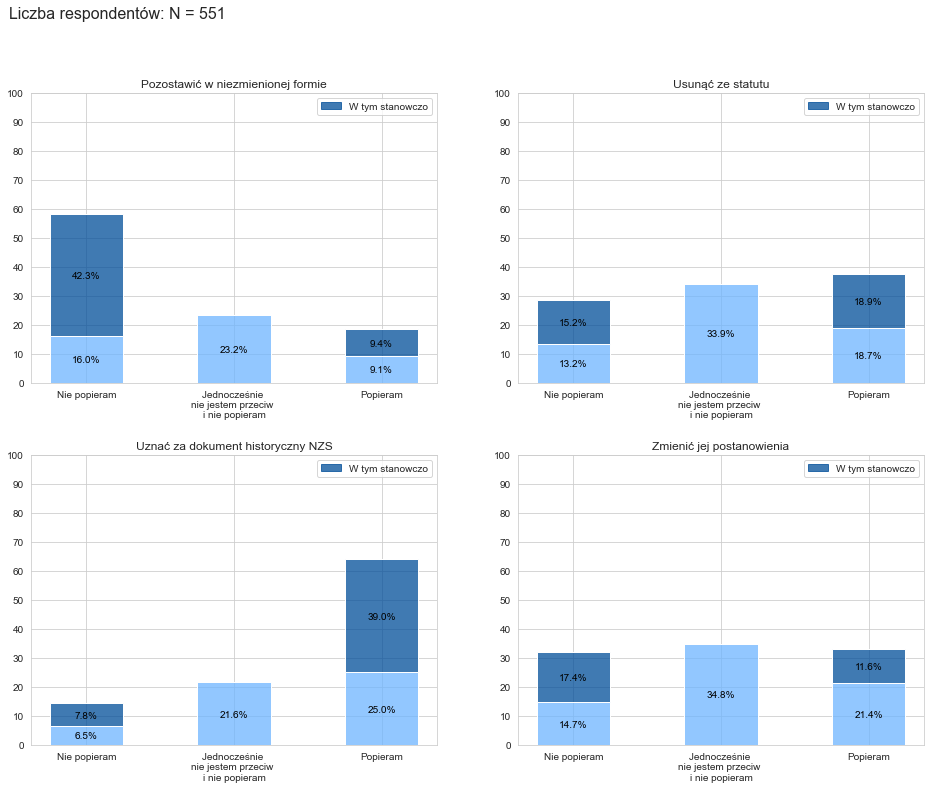

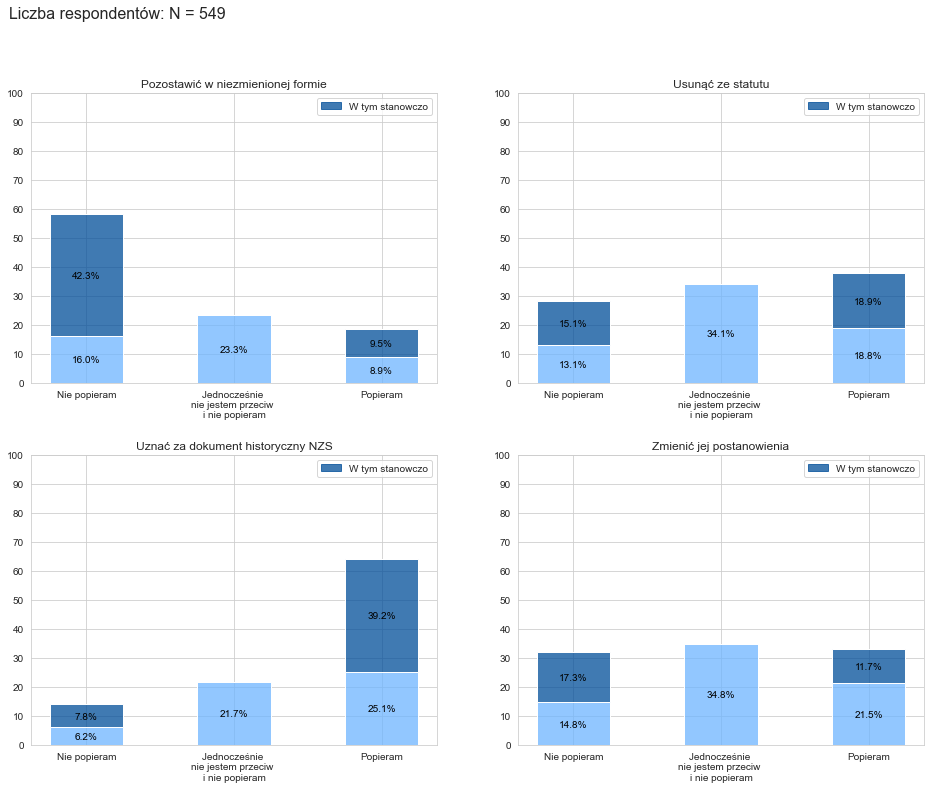

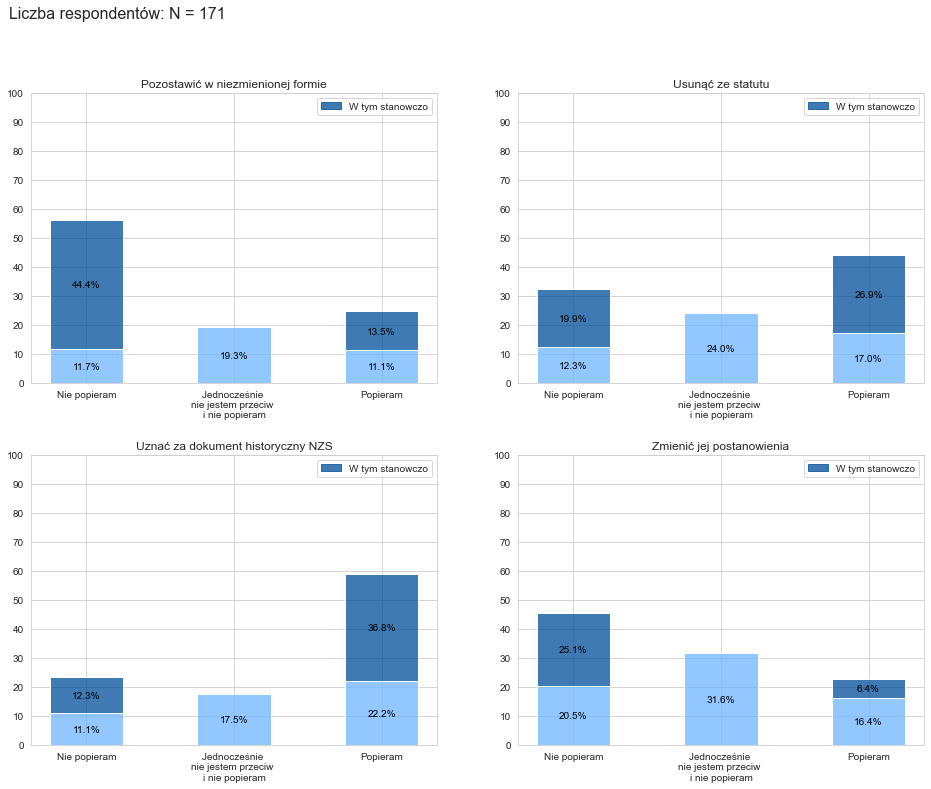

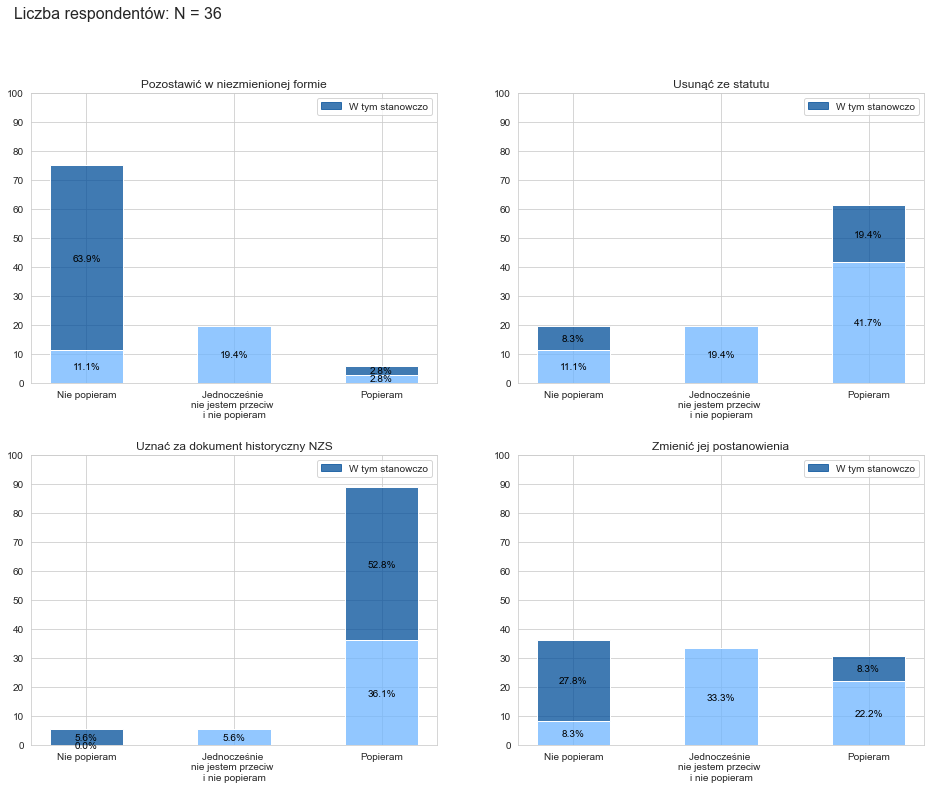

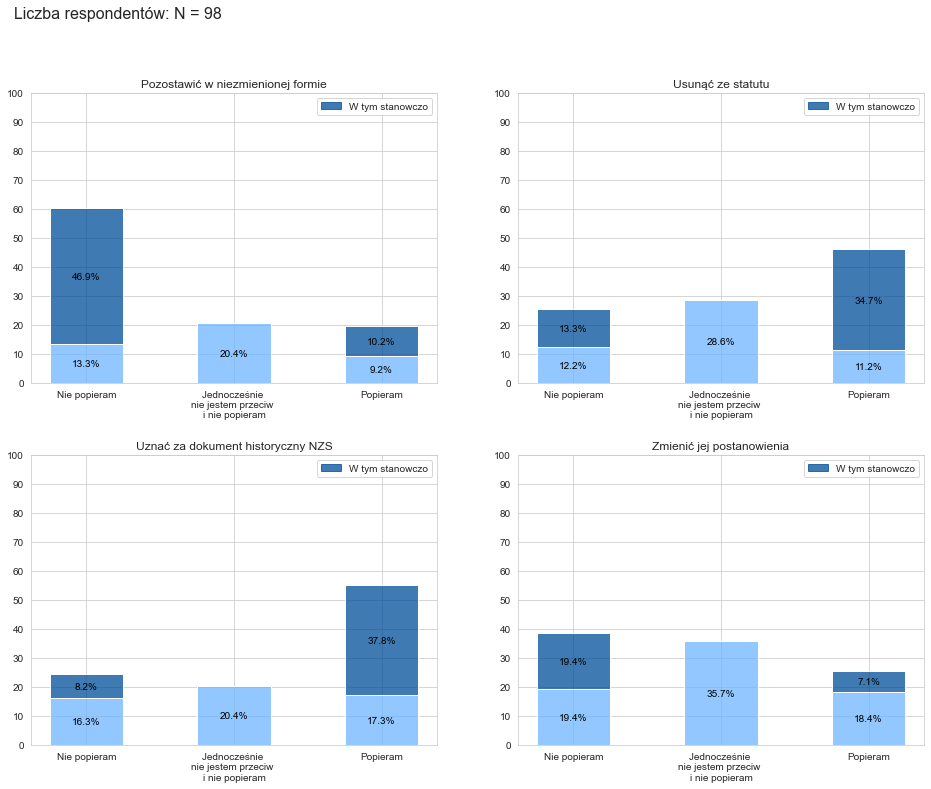

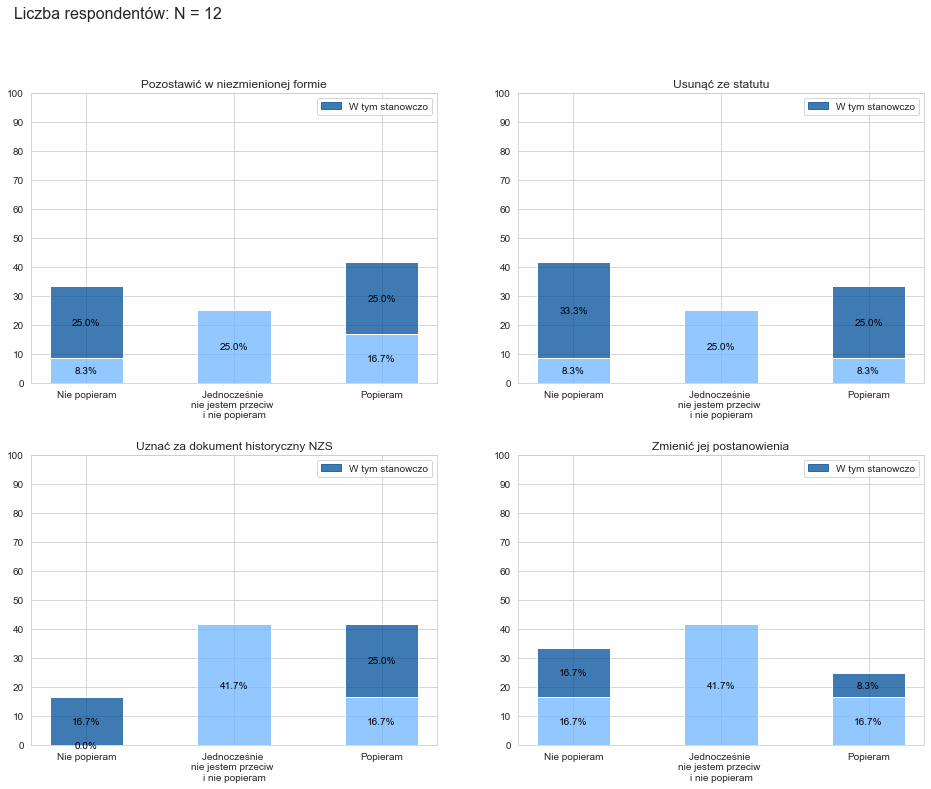

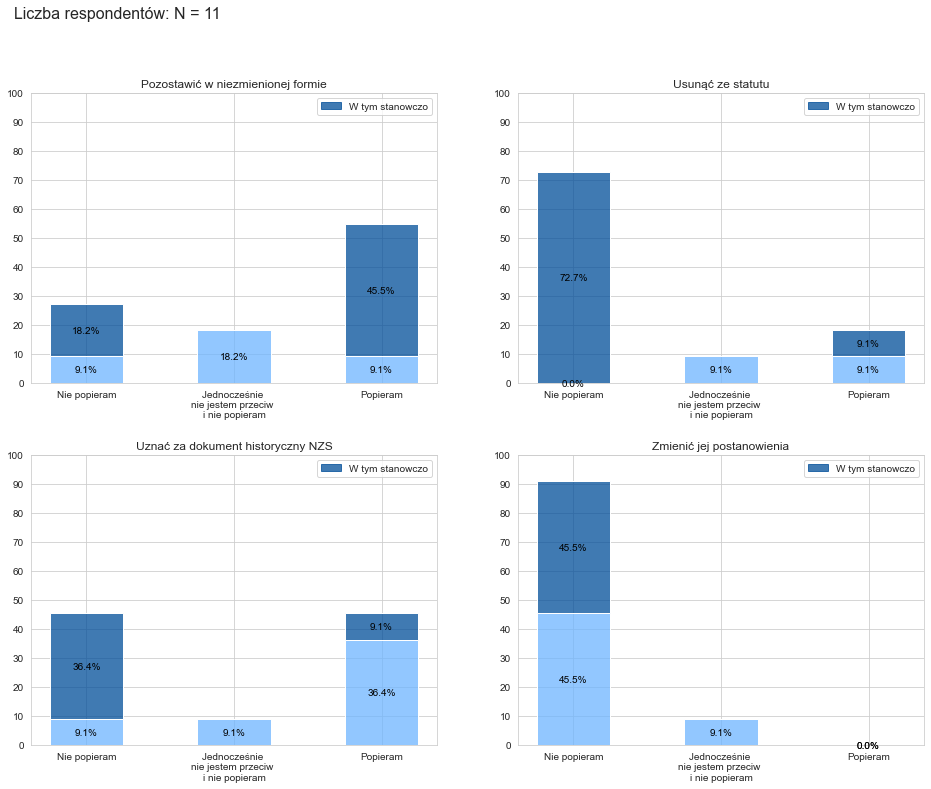

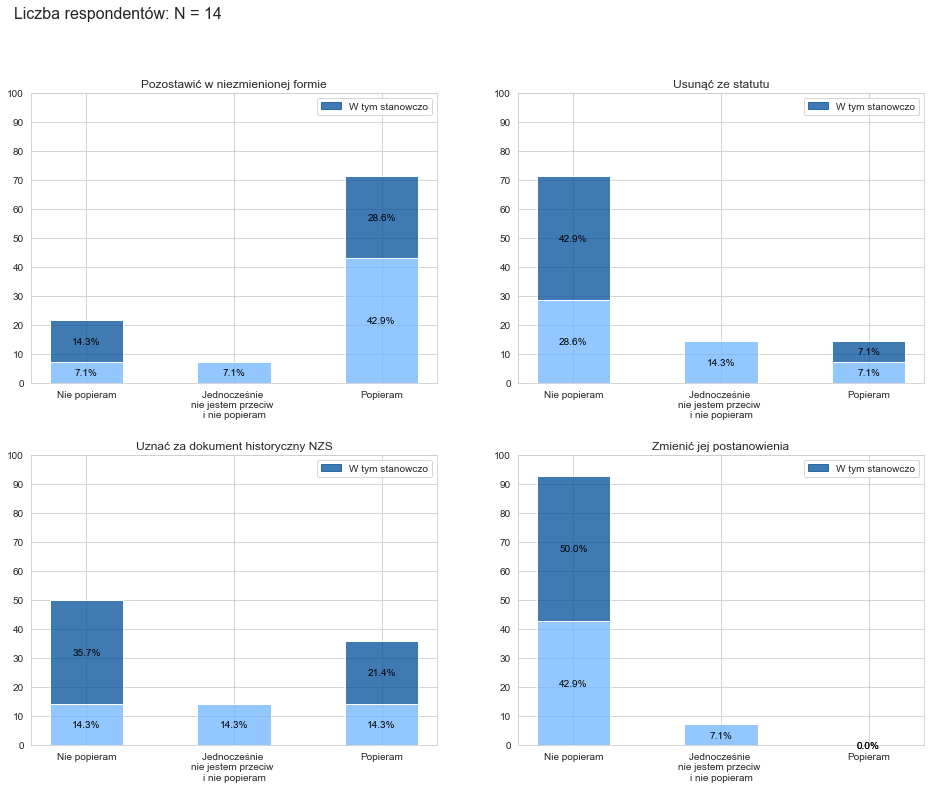

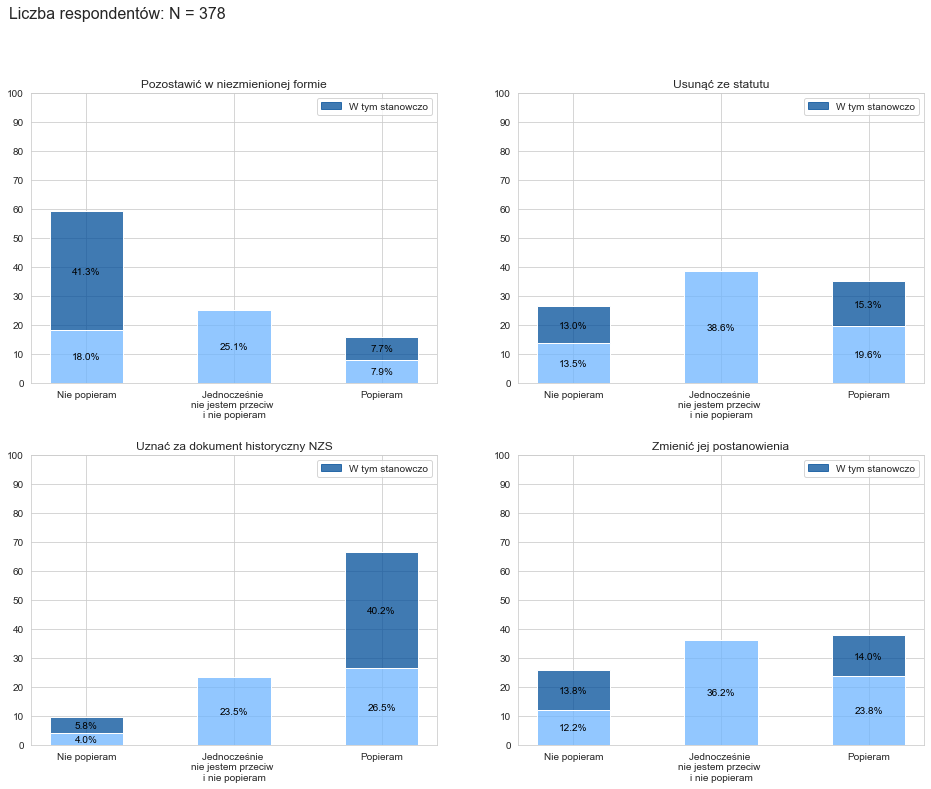

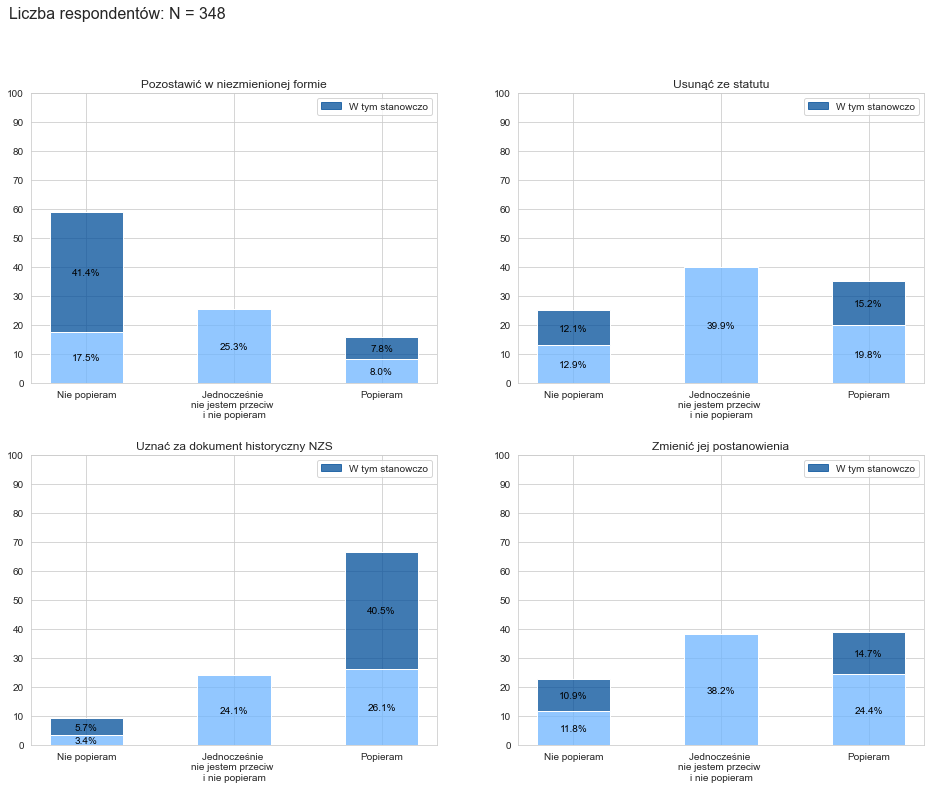

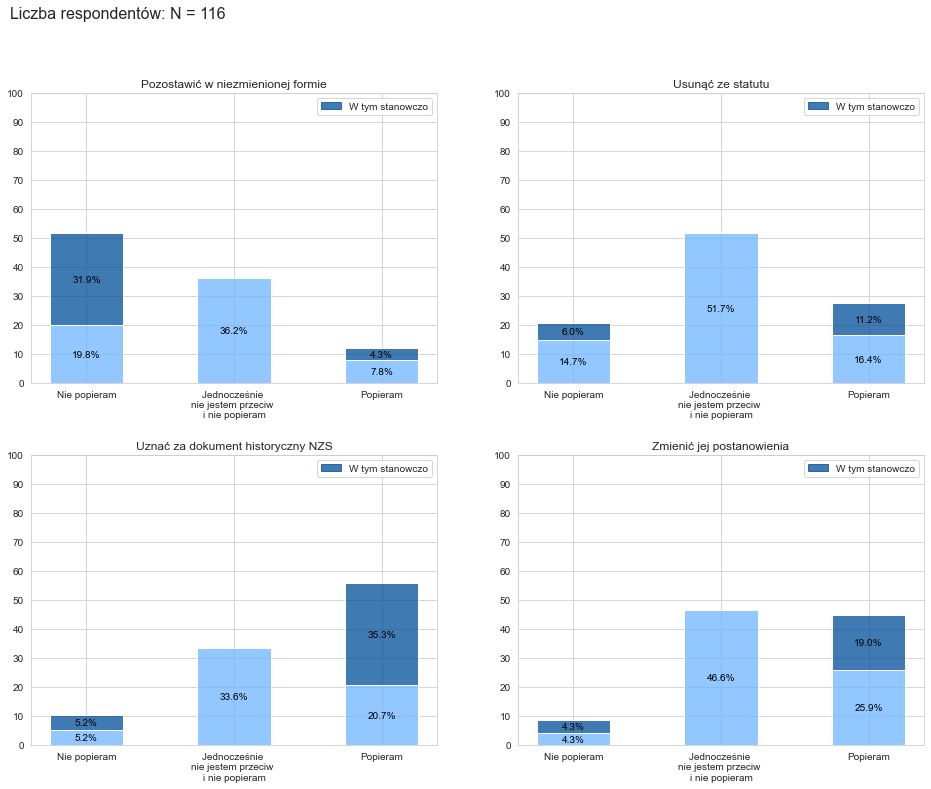

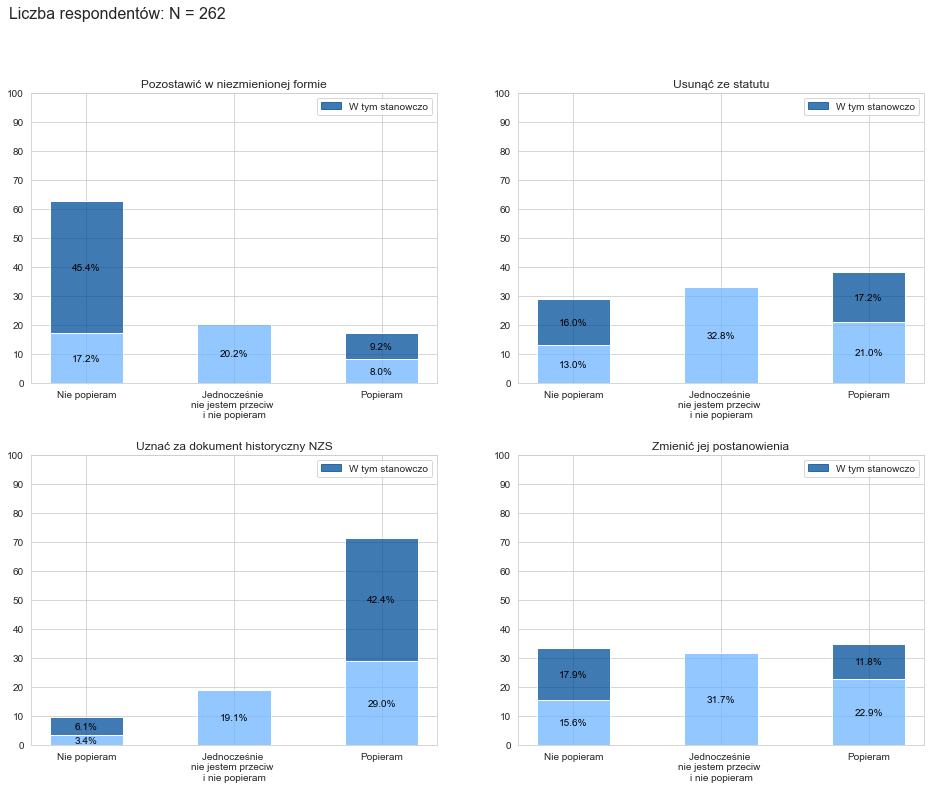

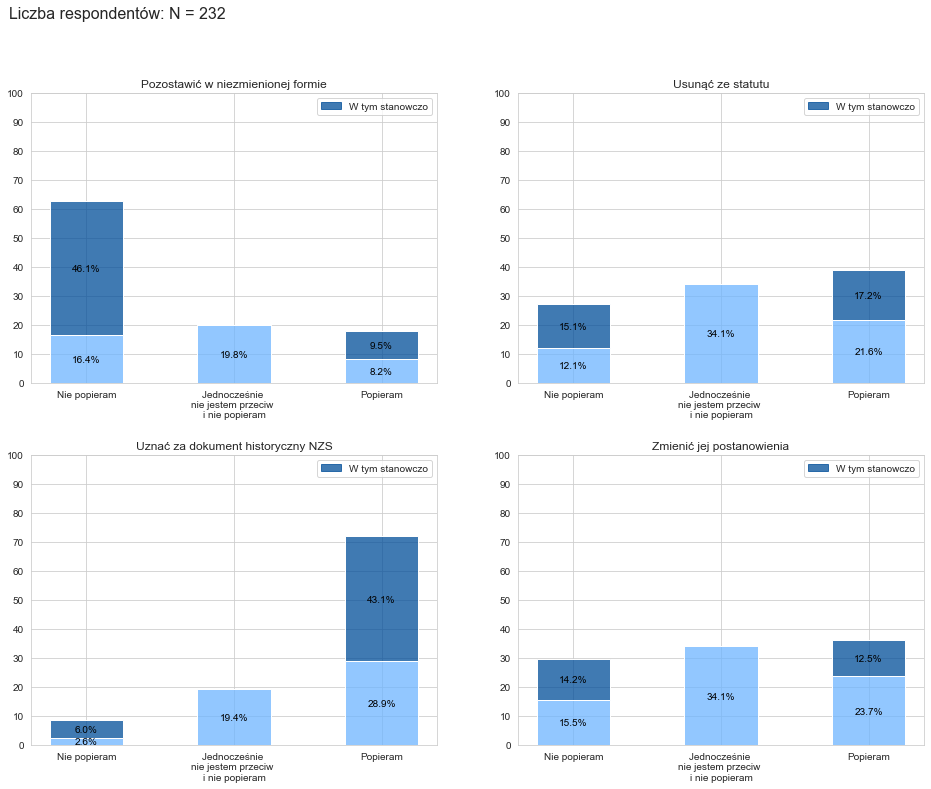

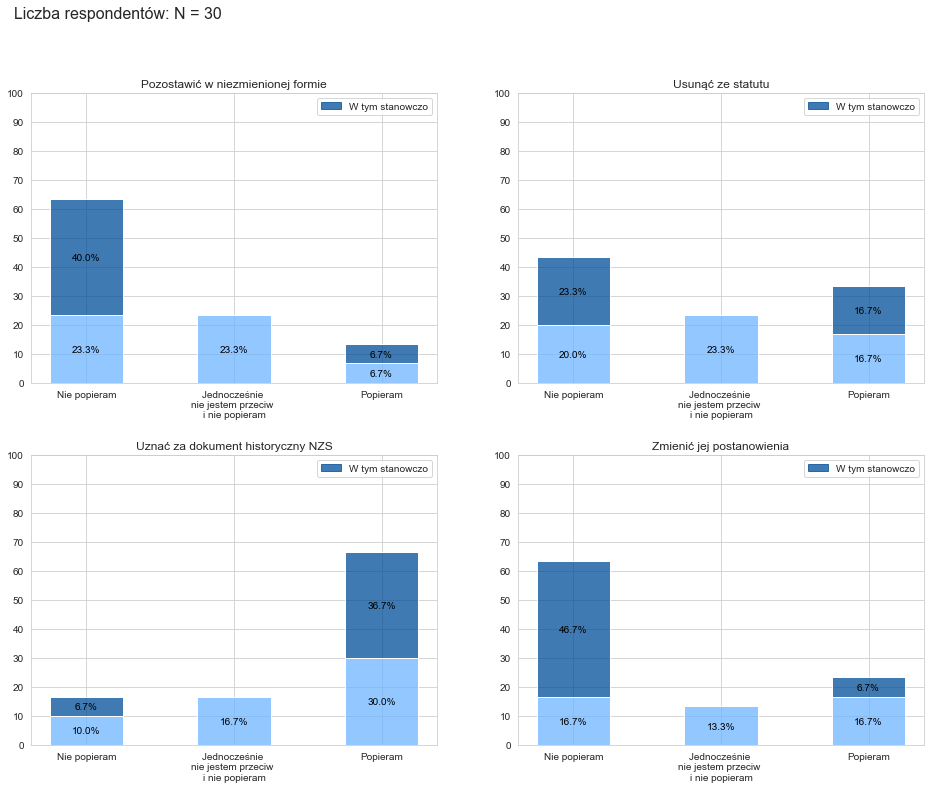

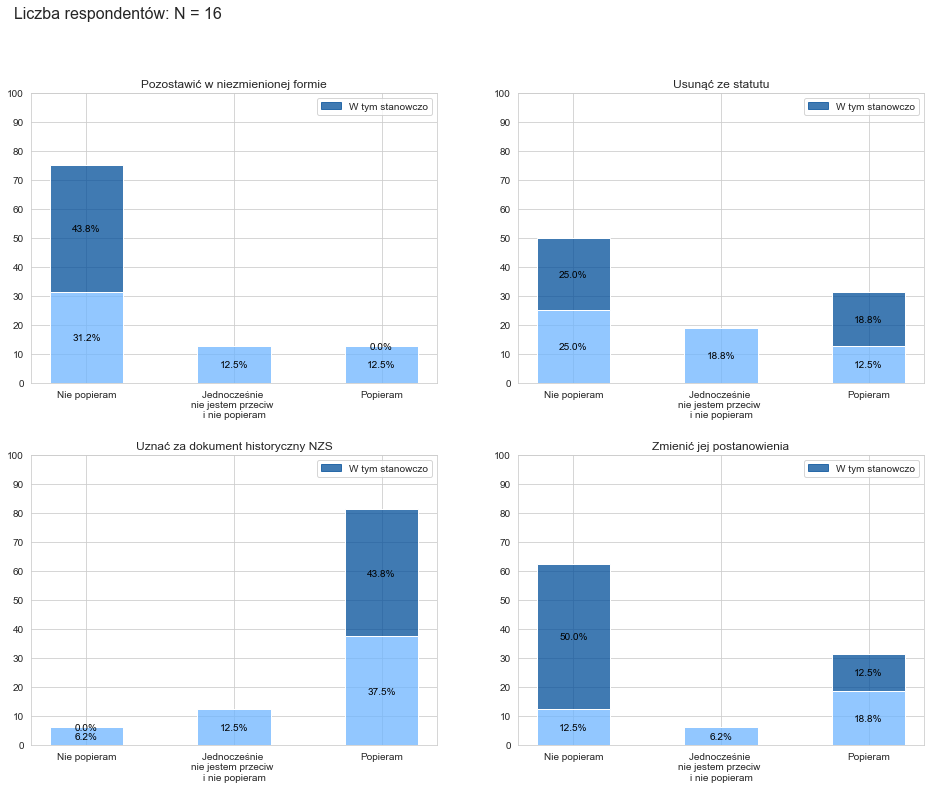

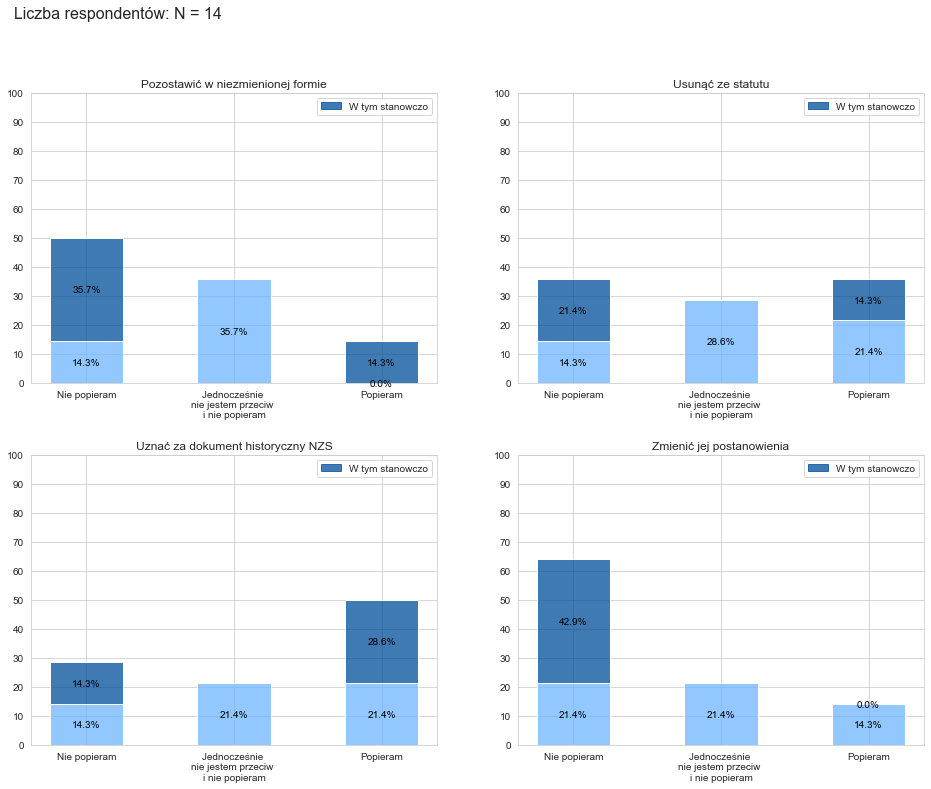

In [202]:
print('Liczba wszystkich odpowiedzi z podziałem na ou:')
print(licz_odpowiedzi('nzs','wszyscy','print','status'))
print()
print()
print('Liczba odpowiedzi od osób z obecnego nzsu według ou:')
print(licz_odpowiedzi('nzs','obecni','print','ou'))


print('wszyscy - wszystkie odpowiedzi w ankiecie (opcja domyślna)')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','wszyscy','df','oba'),'wykres')
print()
print()
#print('Nie jestem członkiem społeczności NZS - wszystkie odpowiedzi w ankiecie bez osób bez związku z nzsem')
#print()
#statystyki_co_zrobic(licz_odpowiedzi('nzs','Nie jestem członkiem społeczności NZS','df','oba'),'print')
#print()
#print()
print('nzs - wszystkie odpowiedzi bez osób spoza społeczności NZSu')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','nzs','df','oba'),'wykres')
print()
print()
print('Alumn - wszyscy alumni')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn','df','oba'),'wykres')  
print()  
print()
print('Alumn1 - alumni do 28 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn1','df','oba'),'wykres')  
print()    
print()
print('Alumn2 - alumni 29-39 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn2','df','oba'),'wykres')    
print()    
print()
print('Alumn3 - alumni 40-50 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn3','df','oba'),'wykres')
print()
print()
print('Alumn4 - alumni 51-61 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn4','df','oba'),'wykres')  
print()   
print()   
print('Alumn5 - alumni od 62 lat')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Alumn5','df','oba'),'wykres')     
print()      
print()
print('obecni - obecni członkowie i sympatycy')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','obecni','df','oba'),'wykres')     
print() 
print()    
print('obecni_bez_wladz - obecni członkowie i sympatycy bez KK, ZK, KKR ')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','obecni_bez_wladz','df','oba'),'wykres')      
print()   
print()   
print('Sympatyk - obecni sympatycy')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Sympatyk','df','oba'),'wykres')
print()      
print()
print('Członek - obecni członkowie')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Członek','df','oba'),'wykres')      
print() 
print()     
print('czlonkowie_bez_wladz - obecni członkowie bez KK, ZK, KKR')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','czlonkowie_bez_wladz','df','oba'),'wykres')      
print() 
print()     
print('wladze - KK, ZK, KKR (uwaga: te grupy nie zaznaczały przynależności do OU)')
statystyki_co_zrobic(licz_odpowiedzi('nzs','wladze','df','oba'),'wykres')     
print() 
print()      
print('Komisja Krajowa - Komisja Krajowa')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Komisja Krajowa','df','oba'),'wykres')      
print()      
print()
print('Zarząd Krajowy/Krajowa Komisja Rewizyjna')
print()
statystyki_co_zrobic(licz_odpowiedzi('nzs','Zarząd Krajowy/Krajowa Komisja Rewizyjna','df','oba'),'wykres')



In [18]:
print()
dane=(licz_odpowiedzi('nzs','obecni','df','oba'))
statystyki_co_zrobic(dane,"print")  
print()



Pozostawić w niezmienionej formie
Stanowczo popieram 7.67%
Popieram 7.94%
Jednocześnie nie jestem przeciw i nie popieram 25.13%
Nie popieram 17.99%
Stanowczo nie popieram 41.27%

Usunąć ze statutu
Stanowczo popieram 15.34%
Popieram 19.58%
Jednocześnie nie jestem przeciw i nie popieram 38.62%
Nie popieram 13.49%
Stanowczo nie popieram 12.96%

Uznać za dokument historyczny NZS
Stanowczo popieram 40.21%
Popieram 26.46%
Jednocześnie nie jestem przeciw i nie popieram 23.54%
Nie popieram 3.97%
Stanowczo nie popieram 5.82%

Zmienić jej postanowienia
Stanowczo popieram 14.02%
Popieram 23.81%
Jednocześnie nie jestem przeciw i nie popieram 36.24%
Nie popieram 12.17%
Stanowczo nie popieram 13.76%




In [31]:
#brudnopis, lepiej nie uruchamiać: 


(stara wersja robienia wykresów)
    # 4 wykresy skumulowane (słupki: popieram+st.pop., pośrednie, nie popieram+st.n.pop.), po jednym dla każdego pytania
        fig, axs = plt.subplots(2, 2, figsize=(14, 10))

        plt.subplot(2,2,1)
        sns.barplot(x=jeden.index, y=jeden.values)
        plt.title('Pozostawić w niezmienionej formie')
        plt.ylabel('Procent')

        plt.subplot(2,2,2)
        sns.barplot(x=dwa.index, y=dwa.values)
        plt.title('Usunąć ze statutu')
        plt.ylabel('Procent')

        plt.subplot(2,2,3)
        sns.barplot(x=trzy.index, y=trzy.values)
        plt.title('Uznać za dokument historyczny NZS')
        plt.ylabel('Procent')

        plt.subplot(2,2,4)
        sns.barplot(x=cztery.index, y=cztery.values)
        plt.title('Zmienić jej postanowienia')
        plt.ylabel('Procent')
        
        plt.tight_layout()
        plt.show()
        
        
### usunięty, niedokończony kod na procenty na słupkach na prezentacji wyników:
        for i, rect in enumerate(p):
                height = rect.get_height()
                ax.annotate('{}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # Przesunięcie w pionie
                            textcoords="offset points",
                            ha='center', va='bottom')
                
                

                
       
        tabela=jeden
        podpisy = ("Nie popieram","Jednocześnie \nnie jestem przeciw \ni nie popieram","Popieram")
        procenty = {"????": np.array([tabela.iloc[3], tabela.iloc[2], tabela.iloc[1]]),
            "W tym stanowczo": np.array([tabela.iloc[4], 0, tabela.iloc[0]])}
        width = 0.5
        
        fig, ax = plt.subplots()
        bottom = np.zeros(3)


        licznik=0
        lista_wys=[]
        for boolean, weight_count in procenty.items():
            p = ax.bar(podpisy, weight_count, width, label=boolean if boolean == "W tym stanowczo" else None, bottom=bottom)
            bottom += weight_count
            for i, rect in enumerate(p):
                height = rect.get_height()
                lista_wys.append(height)
                if licznik<3:
                    index_height=height/2
                    licznik+=1
                else:         
                    index_height=height/2+lista_wys[licznik-3]
                    licznik+=1
                print("Wysokość indeksu:",index_height)
                print("Wysokość słupka:",height)
                print("Wysokość wykresu:",fig.bbox.height)
                print()
                
                y_pos = index_height
                #proporcja_gorny * index_height + proporcja_dolny * rect.get_height()

                
                if height!=0:
                    ax.annotate('{:.2f}%'.format(height),
                                xy=(rect.get_x() + rect.get_width() / 2, y_pos),
                                xytext=(0, 0),  # Przesunięcie w pionie
                                textcoords="offset points",
                                ha='center', va='bottom')
        ax.set_title("Pozostawić w niezmienionej formie")
        ax.legend()

        plt.show()
        
        
        print(ax.figure.bbox.height)
   



SyntaxError: invalid syntax (2891081470.py, line 4)